In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling  import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [2]:
dftrn=pd.read_excel('data_Train.xlsx')

In [4]:
dftrn

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [5]:
dftst=pd.read_excel('Data_Test.xlsx')

In [6]:
dftst

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,NaN,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,NaN,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [7]:
dftrn.shape

(12690, 9)

In [8]:
dftrn.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

In [9]:
dftrn.isnull().sum()

TITLE            1003
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [96]:
#checking for duplicates value in the feature
dftrn.duplicated().sum()

0

In [95]:
#Removing Duplicate values  from the feature
dftrn.drop_duplicates(inplace=True)

In [12]:
#Here we observed that in Rating feature we have NEW and _ so we need to tranformed it and also the type is of object
dftrn[50:100]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
50,CASUAL DINING,13222,"North Indian, Continental, Biryani",8am – 12midnight (Mon-Sun),Kochi,Chittoor Road,3.3,12 votes,400
51,CAFÉ,2419,"Cafe, Continental",11am – 11pm (Mon-Sun),Bangalore,Bannerghatta Road,4.0,236 votes,700
52,CASUAL DINING,7051,"South Indian, North Indian, Chinese, Fast Food",9am – 12:30AM (Mon-Sun),Andheri West,Andheri Lokhandwala,3.9,739 votes,700
53,QUICK BITES,5349,"North Indian, Chinese",12noon – 10pm (Mon-Sun),Bangalore,Rajajinagar,3.7,34 votes,350
54,QUICK BITES,688,"Chinese, North Indian, Mexican, Fast Food",11:30am – 11:30pm (Mon-Sun),Bangalore,Banaswadi,3.7,66 votes,400
55,"CAFÉ,QUICK BITES",13334,Cafe,10am – 9pm (Mon-Sun),Kochi,Panampilly Nagar,3.8,31 votes,400
56,QUICK BITES,2257,"Italian, Pizza",12noon – 4am (Mon-Sun),New Delhi,Rajinder Nagar,3.3,20 votes,400
57,QUICK BITES,6172,"South Indian, North Indian",6am – 10pm (Mon-Sun),Hyderabad,Tarnaka,3.6,219 votes,300
58,CASUAL DINING,4963,Kerala,"12noon – 3:30pm, 7pm – 10pm (Mon-Sun)",682036,Kerala,4.0,145 votes,400
59,CASUAL DINING,638,"North Indian, South Indian, Fast Food, Chinese",7am – 11:30pm (Mon-Sun),Chennai,T. Nagar,3.9,196 votes,800


In [13]:
dftrn['RATING'] = dftrn['RATING'].str.replace('NEW', '1')
dftrn['RATING'] = dftrn['RATING'].str.replace('-', '1').astype(float)

In [14]:
dftrn[100:150]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
100,BAKERY,4933,"Bakery, Desserts",9am – 11pm (Mon-Sun),Chennai,Anna Nagar East,3.8,66 votes,400
101,BEVERAGE SHOP,13927,"Juices, Fast Food, Sandwich, Beverages","10am – 10pm (Mon),9:30am – 10pm (Tue),9:30am –...",Chennai,Poonamalle,3.4,19 votes,250
102,NaN,14529,"Burger, Sandwich","11am – 10pm (Mon, Tue, Wed, Thu, Fri, Sun), 11...",Chennai,Purasaiwalkam,3.5,27 votes,200
103,CASUAL DINING,6413,"Hyderabadi, Andhra, North Indian, Chinese, Sou...","12noon – 4pm, 7pm – 11pm (Mon-Sun)",Bangalore,Whitefield,4.0,284 votes,800
104,QUICK BITES,10156,"Kerala, South Indian",11am – 11pm (Mon-Sun),Kochi,Marine Drive,2.7,119 votes,350
105,CASUAL DINING,2843,"Malwani, Seafood, Maharashtrian","11:30am – 3:30pm, 7pm – 10:30pm (Mon, Wed)...",Mumbai,Dadar West,4.3,1259 votes,700
106,CASUAL DINING,405,"Mediterranean, Continental, Italian, Salad","11:45am – 3:30pm, 6:45pm – 11:30pm (Mon-Sun)",Bangalore,Kalyan Nagar,4.2,789 votes,1400
107,QUICK BITES,8787,"Fast Food, Continental, North Indian",8am – 11pm (Mon-Sun),Kochi,Kakkanad,3.4,159 votes,300
108,BAKERY,7776,"Bakery, Desserts, Beverages",7am – 12midnight (Mon-Sun),Bangalore,BTM,4.0,17 votes,450
109,CASUAL DINING,6902,North Indian,"12noon – 3pm, 7pm – 10:30pm (Mon-Sun)",Kochi,Kakkanad,4.1,180 votes,250


In [15]:
# replacing  the string votes in the votes feature with non space character 
dftrn['VOTES']=dftrn['VOTES'].str.replace('votes',"")


In [258]:
dftrn['LOCATION']=dftrn['CITY'] + " "+ dftrn['LOCALITY']

In [261]:
dftrn.drop(['CITY','LOCALITY'],axis=1,inplace =True)

In [16]:
dftrn

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32,400


In [17]:
dftrn['VOTES']=dftrn['VOTES'].astype(float)

In [268]:
dftrn['RATING']=dftrn['RATING'].astype(float)

In [97]:
dftrn.dtypes

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
CITY              object
LOCALITY          object
RATING           float64
VOTES            float64
COST               int64
CLOSED            object
CITY_MEAN_RAT    float64
dtype: object

<Axes: >

<Figure size 1000x600 with 0 Axes>

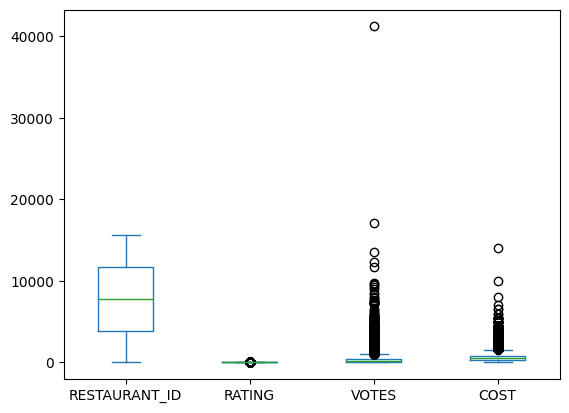

In [20]:
plt.figure(figsize=(10,6))
dftrn.plot(kind='box')

In [21]:
import re
def check_closed(time):
    a = re.findall('Closed \(.*?\)', time)
    if a != []:
        return a[0]
    else:
        return 'NA'

dftrn['CLOSED'] = dftrn['TIME'].apply(check_closed)

In [32]:
dftrn['CLOSED'].value_counts()
dftrn['CLOSED']=dftrn['CLOSED'].str.replace('0','not closed')

<Axes: xlabel='CLOSED'>

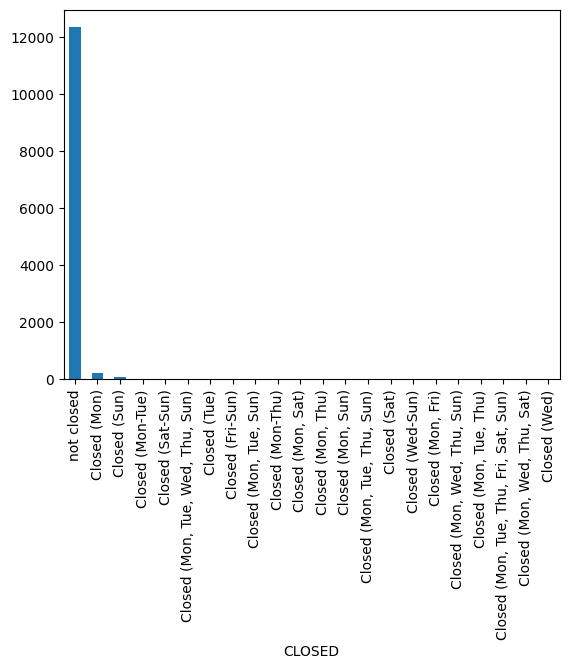

In [35]:
dftrn['CLOSED'].value_counts().plot(kind='bar')

In [ ]:
#Here it is clear that most of the restaurant dont have closed timing

In [39]:
dftrn.groupby(['LOCALITY'])['RATING'].mean()

LOCALITY
(Main Market) Mayur Vihar Phase 2    4.0
1 st Cross street                    3.6
1-7-172/1 Ecil Opposite              3.8
100 Ft Road                          3.0
110009                               4.4
                                    ... 
rajendra nagar                       3.2
seawoods grand central mall          3.9
sector 42                            1.0
shop 7 shikrupa socity               4.1
shop no. 3 Sector 22                 3.8
Name: RATING, Length: 1416, dtype: float64

In [ ]:
# Here it is displaying the average rating of each locality 

In [47]:
dftrn.groupby(['RATING'])['VOTES'].value_counts().head(50)

RATING  VOTES
2.0     226.0    1
        410.0    1
2.1     77.0     1
        112.0    1
        236.0    1
2.2     50.0     1
        225.0    1
2.3     35.0     1
        50.0     1
        59.0     1
        63.0     1
        105.0    1
        221.0    1
        231.0    1
        240.0    1
        278.0    1
        338.0    1
2.4     43.0     1
        59.0     1
        60.0     1
        63.0     1
        71.0     1
        85.0     1
        89.0     1
        91.0     1
        127.0    1
        185.0    1
        215.0    1
        321.0    1
        413.0    1
        422.0    1
        538.0    1
2.5     111.0    2
        340.0    2
        18.0     1
        20.0     1
        32.0     1
        39.0     1
        46.0     1
        53.0     1
        57.0     1
        61.0     1
        69.0     1
        77.0     1
        87.0     1
        90.0     1
        95.0     1
        98.0     1
        101.0    1
        104.0    1
Name: count, dtype: int64

In [50]:
dftrn.TITLE.unique()

113

In [53]:
city_mean=dftrn.groupby(['CITY'])['RATING'].mean()

In [55]:
city_mean.columns=['CITY','CITY_RATING_MEAN']
dftrn = dftrn.merge(city_mean, on=['CITY'],how='left')

In [56]:
dftrn

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING_x,VOTES,COST,CLOSED,RATING_y
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200,not closed,3.390722
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500,not closed,3.581785
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800,not closed,3.581785
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800,not closed,3.693844
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300,not closed,3.693844
...,...,...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546.0,500,not closed,3.616557
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214.0,1800,not closed,3.693844
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608.0,1300,not closed,3.536364
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32.0,400,not closed,3.581785


In [57]:
dftrn.rename(columns={"RATING_x":'RATING'},inplace =True)

In [58]:
dftrn.rename(columns={"RATING_y":'CITY_MEAN_RAT'},inplace =True)

In [59]:
dftrn[50:100]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,CLOSED,CITY_MEAN_RAT
50,CASUAL DINING,13222,"North Indian, Continental, Biryani",8am – 12midnight (Mon-Sun),Kochi,Chittoor Road,3.3,12.0,400,not closed,2.463772
51,CAFÉ,2419,"Cafe, Continental",11am – 11pm (Mon-Sun),Bangalore,Bannerghatta Road,4.0,236.0,700,not closed,3.691484
52,CASUAL DINING,7051,"South Indian, North Indian, Chinese, Fast Food",9am – 12:30AM (Mon-Sun),Andheri West,Andheri Lokhandwala,3.9,739.0,700,not closed,4.041667
53,QUICK BITES,5349,"North Indian, Chinese",12noon – 10pm (Mon-Sun),Bangalore,Rajajinagar,3.7,34.0,350,not closed,3.691484
54,QUICK BITES,688,"Chinese, North Indian, Mexican, Fast Food",11:30am – 11:30pm (Mon-Sun),Bangalore,Banaswadi,3.7,66.0,400,not closed,3.691484
55,"CAFÉ,QUICK BITES",13334,Cafe,10am – 9pm (Mon-Sun),Kochi,Panampilly Nagar,3.8,31.0,400,not closed,2.463772
56,QUICK BITES,2257,"Italian, Pizza",12noon – 4am (Mon-Sun),New Delhi,Rajinder Nagar,3.3,20.0,400,not closed,3.703861
57,QUICK BITES,6172,"South Indian, North Indian",6am – 10pm (Mon-Sun),Hyderabad,Tarnaka,3.6,219.0,300,not closed,3.616557
58,CASUAL DINING,4963,Kerala,"12noon – 3:30pm, 7pm – 10pm (Mon-Sun)",682036,Kerala,4.0,145.0,400,not closed,4.000000
59,CASUAL DINING,638,"North Indian, South Indian, Fast Food, Chinese",7am – 11:30pm (Mon-Sun),Chennai,T. Nagar,3.9,196.0,800,not closed,3.581785


In [282]:
dftrn

,TITLE,RESTAURANT_ID,CUISINES,TIME,RATING,VOTES,COST,LOCATION,CLOSED,LOCATION_MEAN_RAT
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",3.6,49.0,1200,Thane Dombivali East,NA,2.916667
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),4.2,30.0,1500,Chennai Ramapuram,NA,3.463043
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",3.8,221.0,800,Chennai Saligramam,NA,3.442857
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),4.1,24.0,800,Mumbai Bandra West,NA,3.735714
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),3.8,165.0,300,Mumbai Lower Parel,NA,4.093750
...,...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",3.8,546.0,500,Hyderabad Gachibowli,NA,3.684848
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",4.3,1214.0,1800,Mumbai Bandra Kurla Complex,NA,4.159259
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),4.0,608.0,1300,Navi Mumbai Vashi,NA,3.875000
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),3.5,32.0,400,Chennai Maduravoyal,NA,3.500000


In [113]:
#locality_mean = dftrn.groupby(['LOCATION'])['RATING'].mean()
#locality_mean.columns = ['LOCALITY','LOCALITY_MEAN_RATING']
#dftrn = dftrn.merge(locality_mean, on=['LOCALITY'],how='left')

In [283]:
dftrn

,TITLE,RESTAURANT_ID,CUISINES,TIME,RATING,VOTES,COST,LOCATION,CLOSED,LOCATION_MEAN_RAT
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",3.6,49.0,1200,Thane Dombivali East,NA,2.916667
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),4.2,30.0,1500,Chennai Ramapuram,NA,3.463043
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",3.8,221.0,800,Chennai Saligramam,NA,3.442857
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),4.1,24.0,800,Mumbai Bandra West,NA,3.735714
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),3.8,165.0,300,Mumbai Lower Parel,NA,4.093750
...,...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",3.8,546.0,500,Hyderabad Gachibowli,NA,3.684848
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",4.3,1214.0,1800,Mumbai Bandra Kurla Complex,NA,4.159259
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),4.0,608.0,1300,Navi Mumbai Vashi,NA,3.875000
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),3.5,32.0,400,Chennai Maduravoyal,NA,3.500000


In [115]:
dftrn.rename(columns={"RATING_x":'RATING'},inplace =True)

In [116]:
dftrn.rename(columns={"RATING_y":'_MEAN_RATING'},inplace =True)

In [60]:
dftrn

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,CLOSED,CITY_MEAN_RAT
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200,not closed,3.390722
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500,not closed,3.581785
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800,not closed,3.581785
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800,not closed,3.693844
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300,not closed,3.693844
...,...,...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546.0,500,not closed,3.616557
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214.0,1800,not closed,3.693844
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608.0,1300,not closed,3.536364
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32.0,400,not closed,3.581785


In [98]:
dftrn.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
CLOSED           0
CITY_MEAN_RAT    0
dtype: int64

#Here we observed that missing values are there in all the feature except target varibale cost ,closed ,TIME,CUISINES,RESTAURANT_ID

In [99]:
# here i have used lambda function that will replace  each nan value in a feature with most frequent value of thar feature 
# Assuming dftrn is your DataFrame
columns_to_fill_object = ['TITLE', 'CITY','LOCALITY']

for col in columns_to_fill_object:
    dftrn[col] = dftrn[col].fillna(dftrn[col].mode().iloc[0])

# Now the specified columns have missing values replaced with their respective modes
columns_to_fill_num = ['RATING', 'VOTES' ,'CITY_MEAN_RAT']
for col in columns_to_fill_num:
    dftrn[col] = dftrn[col].fillna(dftrn[col].mean())




In [121]:
dftrn['RATING'].mean()

3.5215715636822194

In [100]:
dftrn.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
CLOSED           0
CITY_MEAN_RAT    0
dtype: int64

In [64]:
dftrn['TITLE'][0:50]

0                 CASUAL DINING
1             CASUAL DINING,BAR
2                 CASUAL DINING
3                   QUICK BITES
4                DESSERT PARLOR
5                 CASUAL DINING
6                          CAFÉ
7                  MICROBREWERY
8                   QUICK BITES
9                   QUICK BITES
10                CASUAL DINING
11    QUICK BITES,BEVERAGE SHOP
12                CASUAL DINING
13                CASUAL DINING
14                  QUICK BITES
15     CASUAL DINING,IRANI CAFE
16                CASUAL DINING
17                CASUAL DINING
18                CASUAL DINING
19           BAKERY,QUICK BITES
20                CASUAL DINING
21                  QUICK BITES
22                  QUICK BITES
23                CASUAL DINING
24                         CAFÉ
25                  QUICK BITES
26                CASUAL DINING
27            BAR,CASUAL DINING
28                          BAR
29                          PUB
30                  QUICK BITES
31      

In [65]:
dftrn.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
CLOSED           0
CITY_MEAN_RAT    0
dtype: int64

In [41]:
dftrn.isnull().sum()

TITLE                0
RESTAURANT_ID        0
CUISINES             0
TIME                 0
CITY                 0
LOCALITY             0
RATING               0
VOTES                0
COST                 0
LOCAL_MEAN_RATING    0
dtype: int64

In [ ]:
#Here now we observed that all the missing values are handled properly

In [104]:
for i in dftrn.columns:
    print(dftrn[i].value_counts())

TITLE
QUICK BITES               5211
CASUAL DINING             3645
CAFÉ                       606
DESSERT PARLOR             381
CASUAL DINING,BAR          349
                          ... 
BAKERY,FOOD COURT            1
CLUB,MICROBREWERY            1
QUICK BITES,FOOD TRUCK       1
BAKERY,BEVERAGE SHOP         1
BAR,MICROBREWERY             1
Name: count, Length: 112, dtype: int64
RESTAURANT_ID
7264     8
4634     7
9910     6
7745     5
4058     5
        ..
11517    1
7773     1
9982     1
13577    1
6134     1
Name: count, Length: 11892, dtype: int64
CUISINES
South Indian                                532
North Indian                                524
North Indian, Chinese                       500
Fast Food                                   286
Chinese                                     167
                                           ... 
BBQ, Rolls                                    1
Italian, North Indian, Chinese, Salad         1
Andhra, Seafood, Biryani                     

In [103]:
#for i in dftrn.columns:
dftrn['RESTAURANT_ID'].drop_duplicates(inplace=True)

In [105]:
for i in dftrn.columns:
    print(dftrn[i].duplicated())

0        False
1        False
2         True
3        False
4        False
         ...  
12685     True
12686     True
12687     True
12688     True
12689     True
Name: TITLE, Length: 12665, dtype: bool
0        False
1        False
2        False
3        False
4        False
         ...  
12685    False
12686    False
12687     True
12688    False
12689     True
Name: RESTAURANT_ID, Length: 12665, dtype: bool
0        False
1        False
2        False
3        False
4        False
         ...  
12685    False
12686    False
12687    False
12688     True
12689     True
Name: CUISINES, Length: 12665, dtype: bool
0        False
1        False
2        False
3        False
4        False
         ...  
12685     True
12686    False
12687     True
12688     True
12689     True
Name: TIME, Length: 12665, dtype: bool
0        False
1        False
2         True
3        False
4         True
         ...  
12685     True
12686     True
12687     True
12688     True
12689     True
Name:

In [41]:
#checking for unique values in each features
dftrn.nunique()

TITLE                  113
RESTAURANT_ID        11892
CUISINES              4155
TIME                  2689
CITY                   360
LOCALITY              1417
RATING                  31
VOTES                 1848
COST                    86
CLOSED                  22
CITY_MEAN_RAT           75
LOCAL_MEAN_RATING      490
dtype: int64

In [52]:
#Checking for unique value in TITLE feature
len(dftrn['TITLE'].unique())

112

In [294]:
# checking for location wise rating and count  of restaurant of that rating
dftrn.groupby('LOCATION')['RATING'].value_counts().head(50)

LOCATION                                                                            RATING
10th avenue Saane Apartment                                                         3.6       1
1st Stage Maruthi Nagar Main Road                                                   3.8       1
1st Tavarekere 3rd Cross Cashire Layout                                             3.4       1
3rd Street Old Door AA24 AA Block                                                   4.3       1
5th Main Teachers Colony Koramangala Block 1 Bangalore 560034 The Mylapore Cafe 29  4.1       1
6 & 7 - 4/64 Subhash Nagar 5                                                        3.9       1
682035. Kerala                                                                      1.0       1
682036 Kerala                                                                       4.0       1
Adjacent To Commercial Street Meenakashi Kovil Street                               3.9       1
Aluva Circle Athani                          

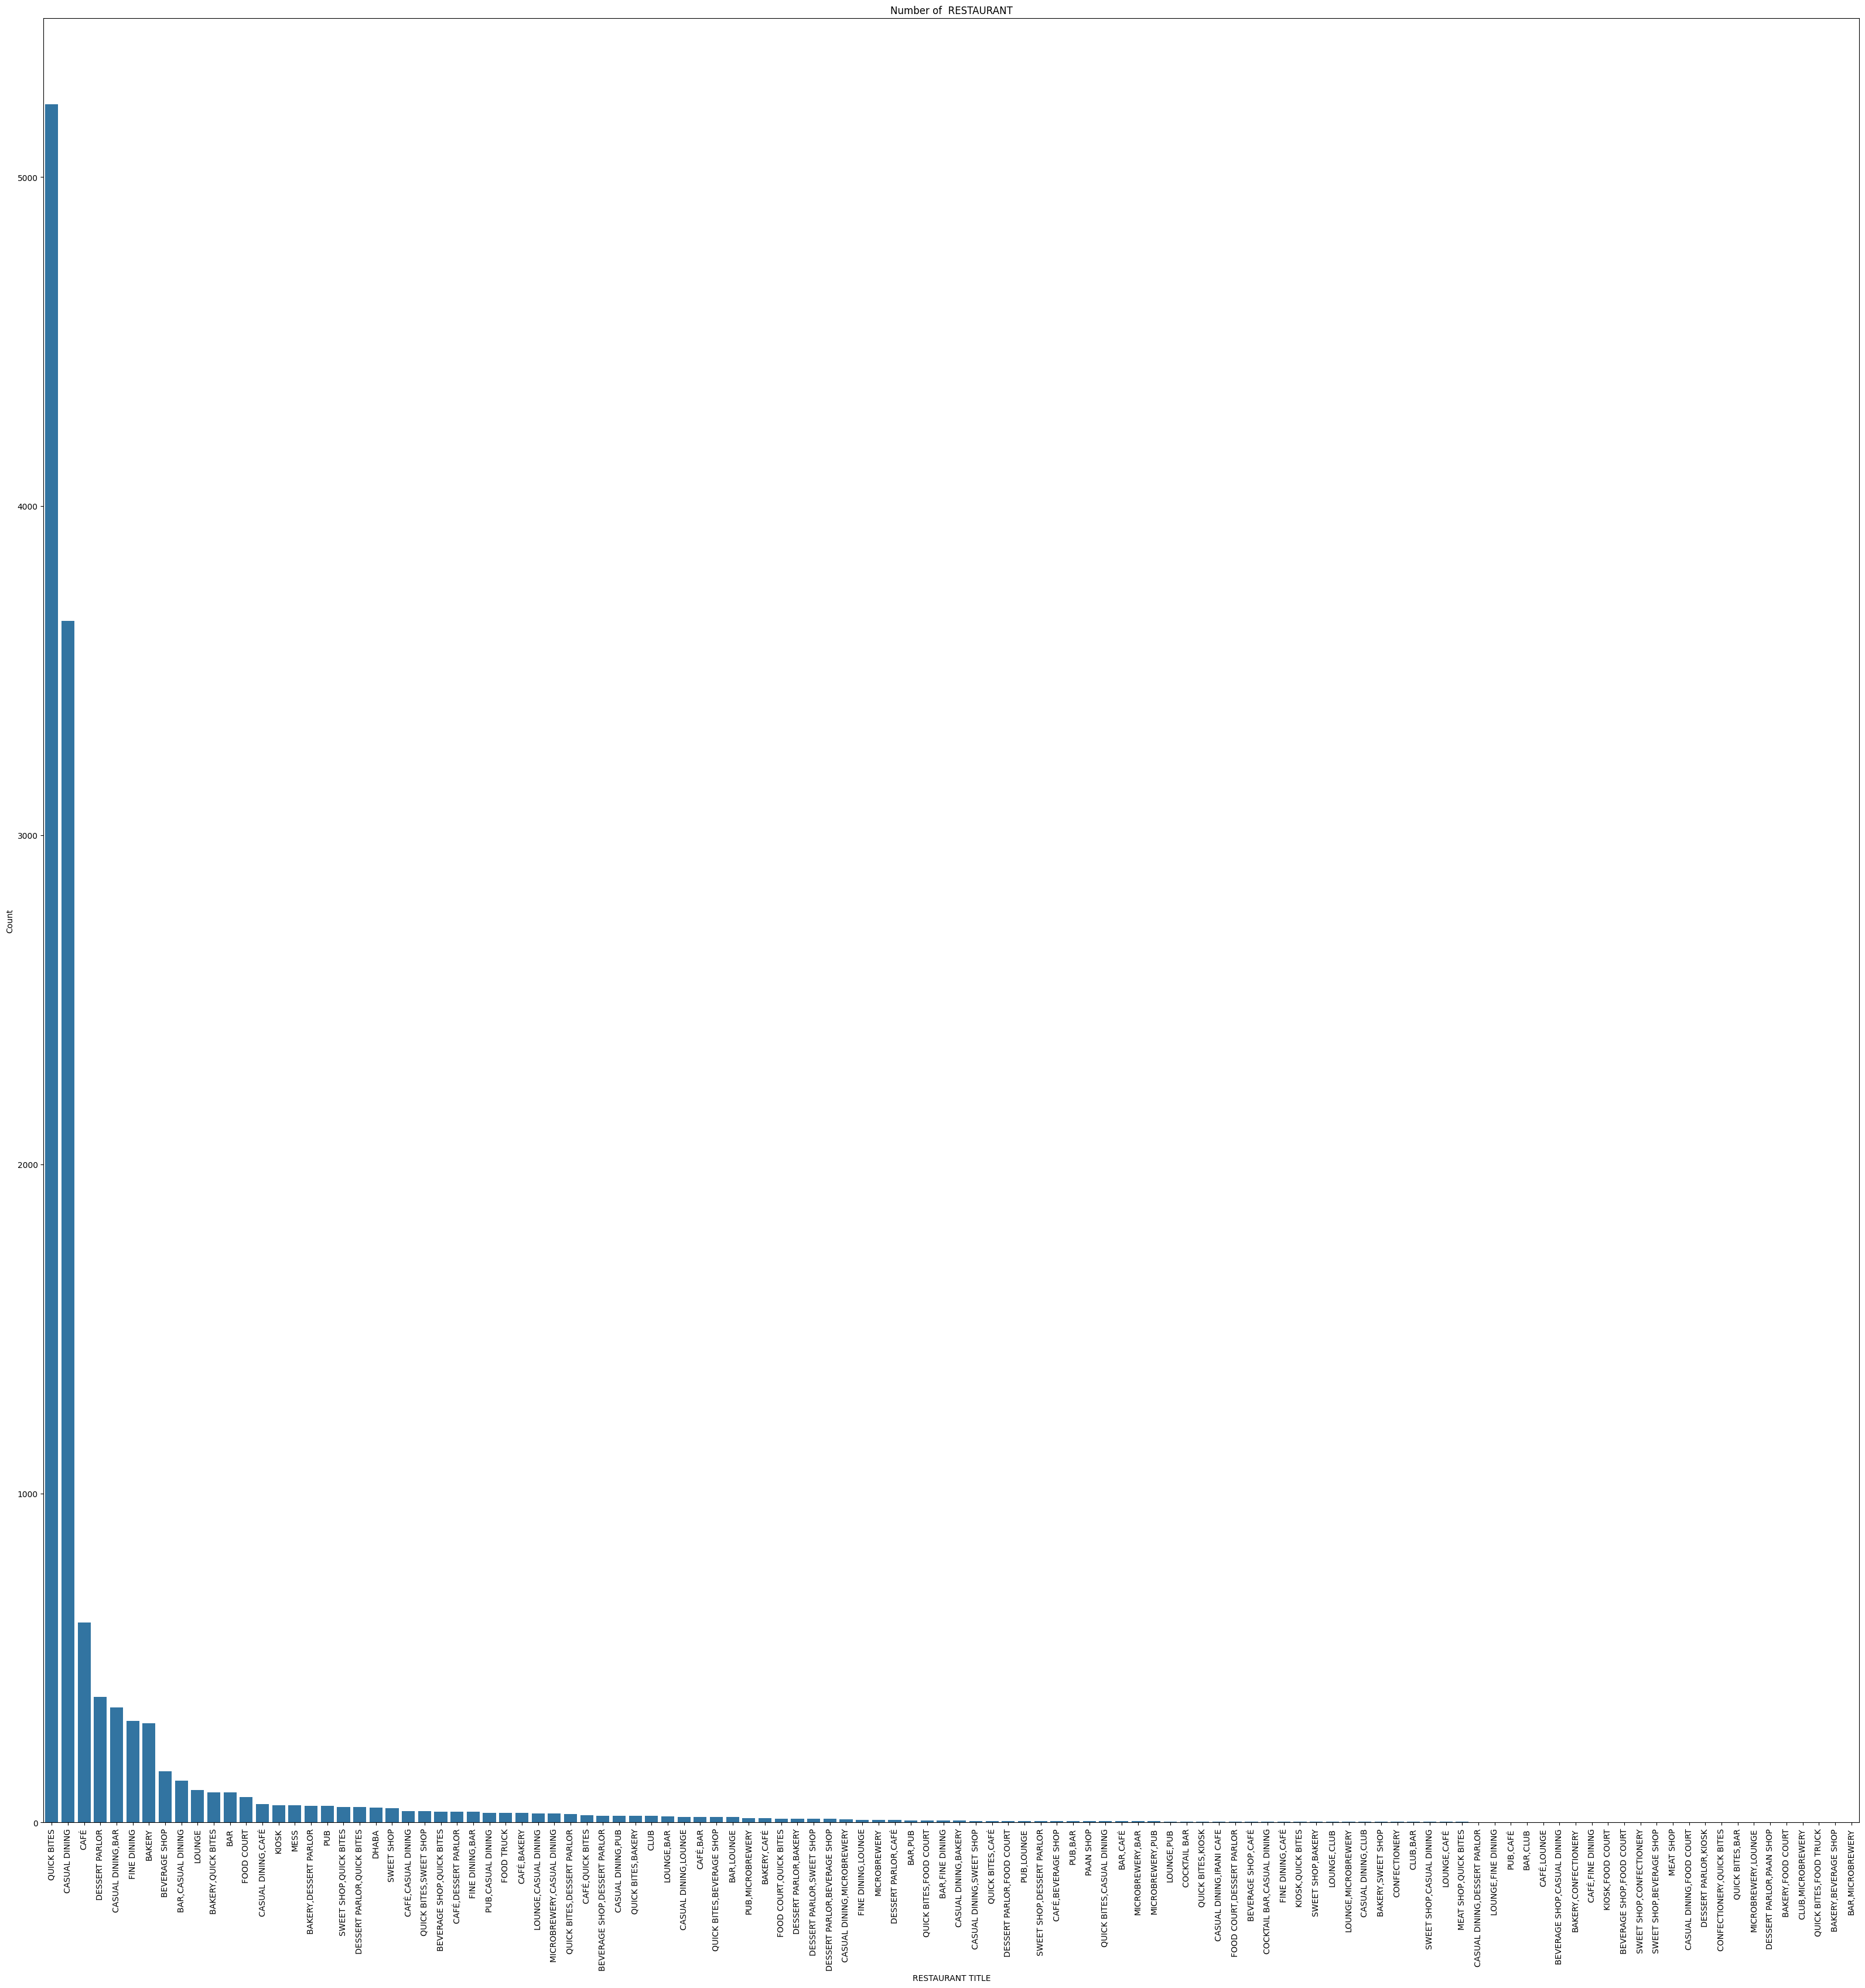

In [295]:
fig=plt.figure(figsize=(40,40))
sns.barplot(x=dftrn['TITLE'].value_counts().index, y=dftrn['TITLE'].value_counts())
plt.xlabel('RESTAURANT TITLE')
plt.ylabel('Count')
plt.title('Number of  RESTAURANT')
plt.xticks(rotation=90)
plt.show()


#Here from the above observation one thing is clear that most of the restaurant have Title either Quick bites and Casual Dinning

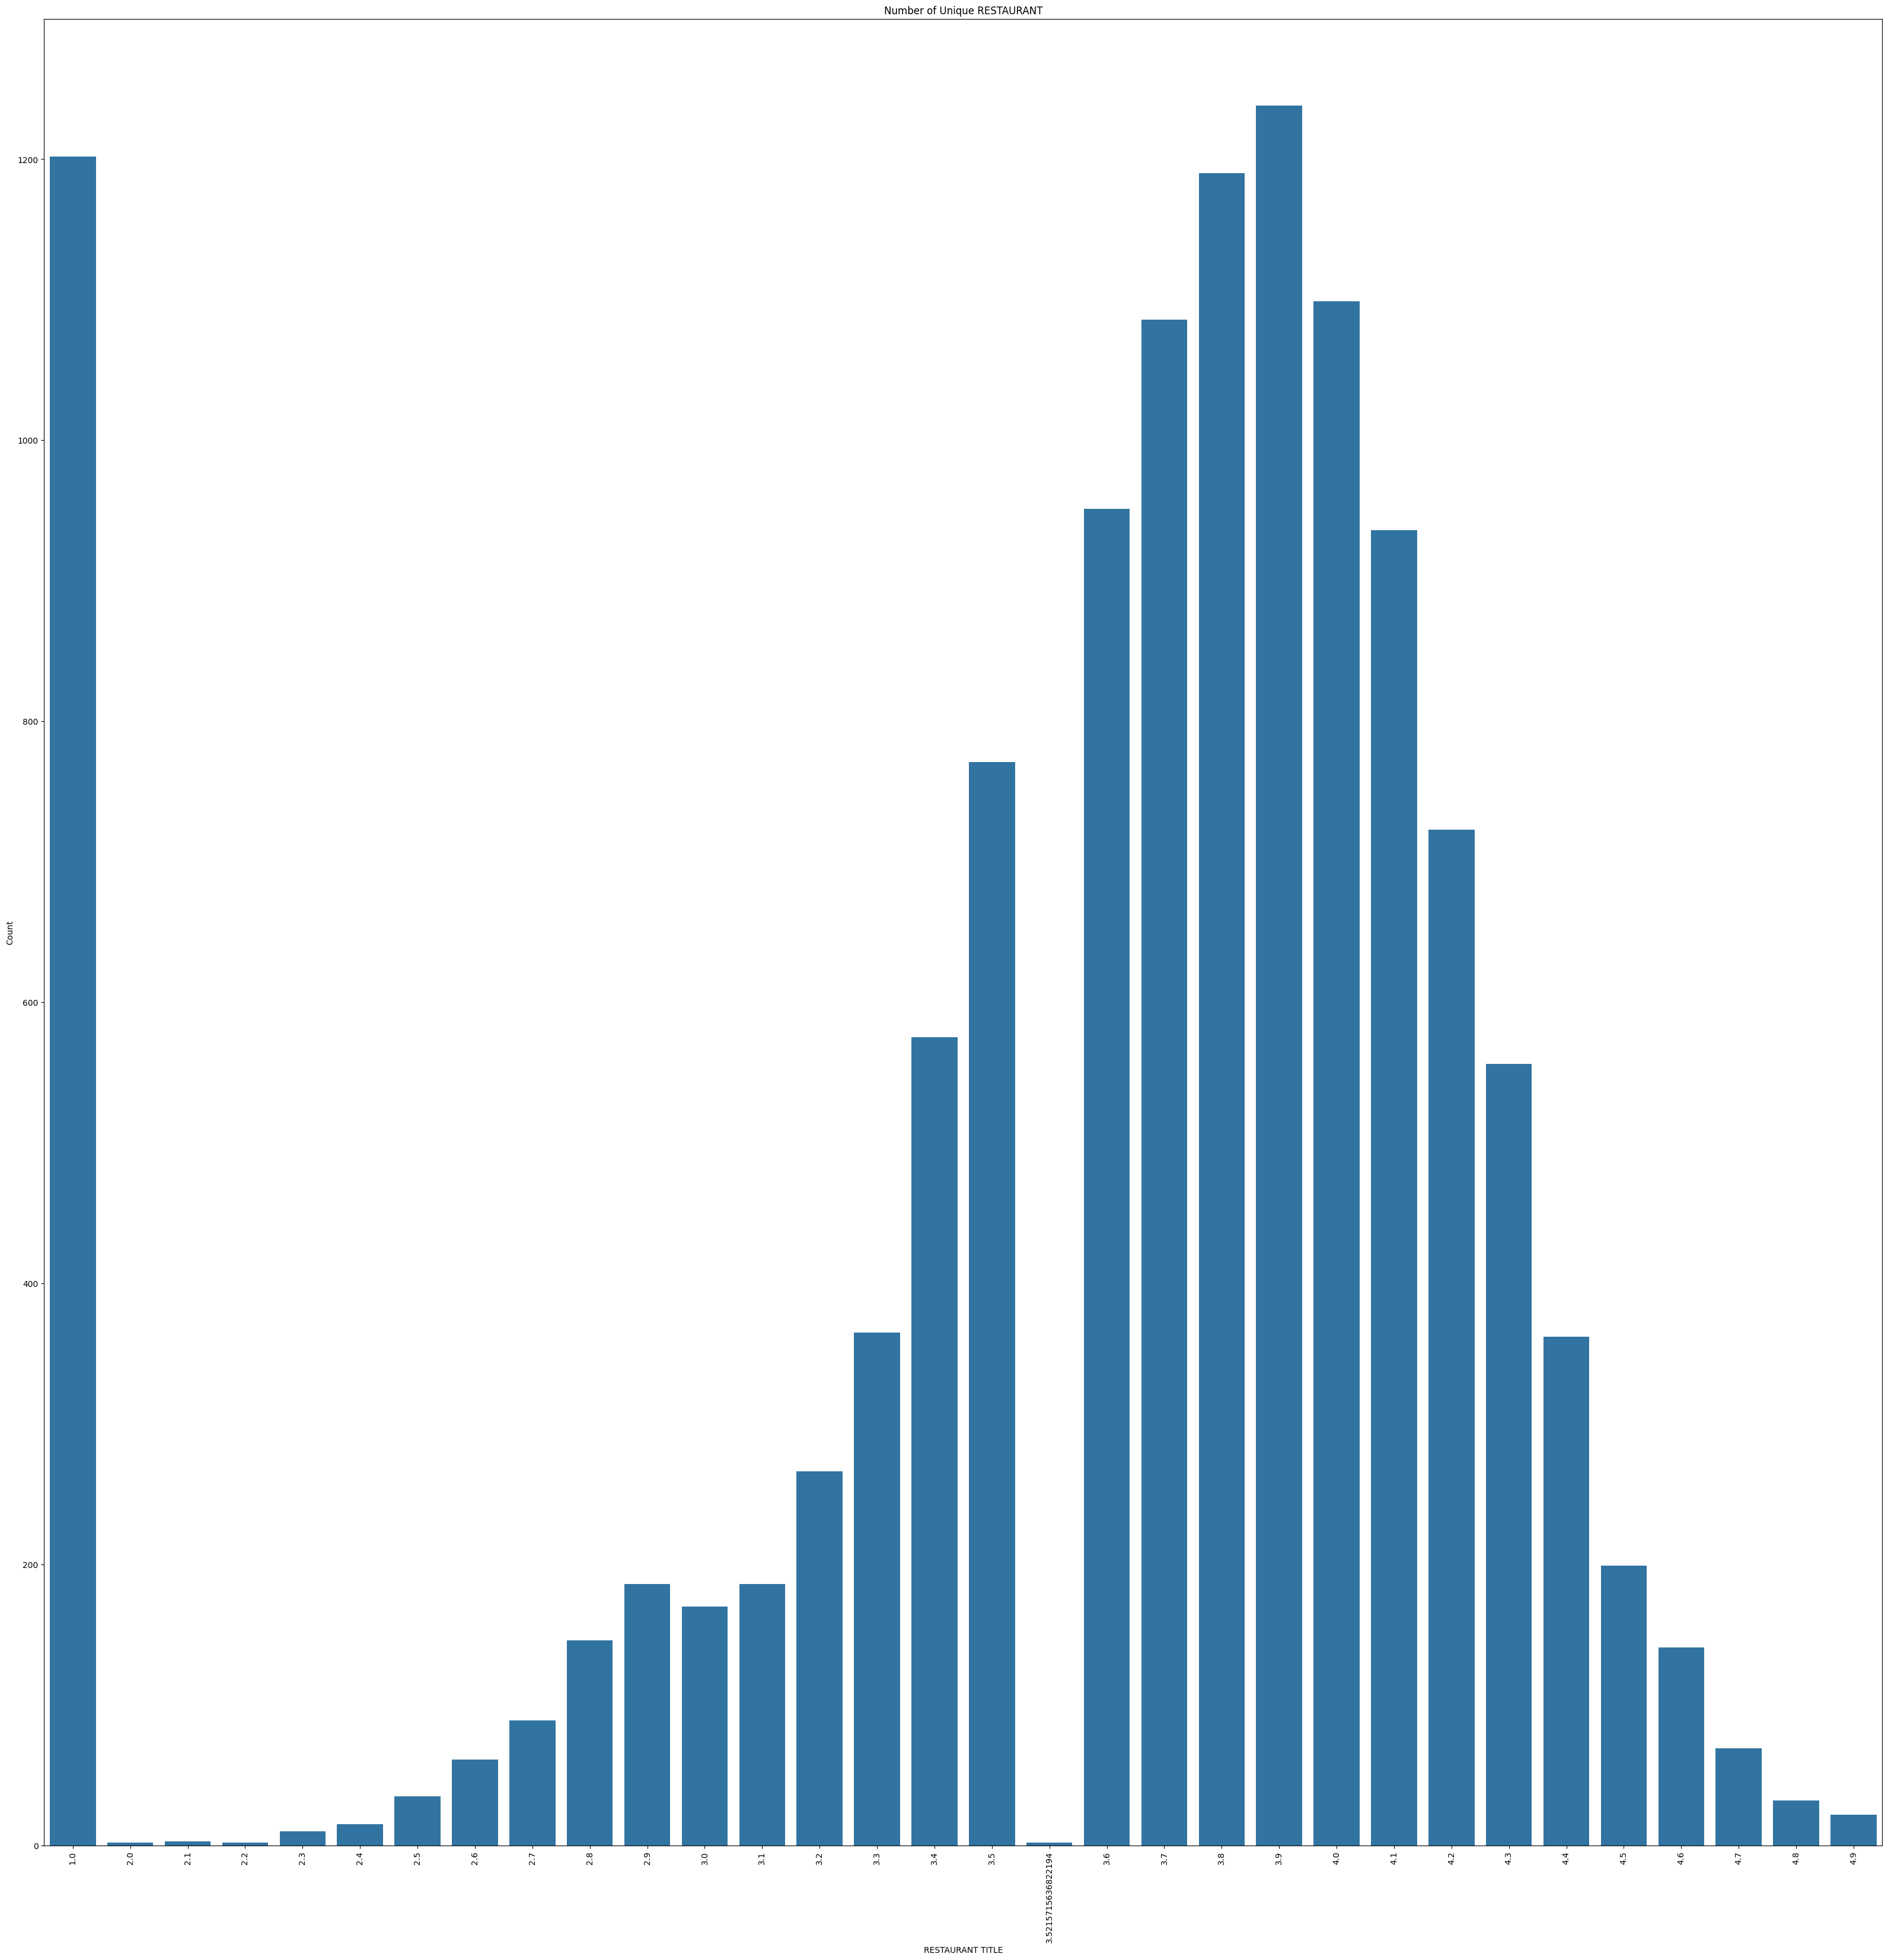

In [296]:
fig=plt.figure(figsize=(40,40))
sns.barplot(x=dftrn['RATING'].value_counts().index, y=dftrn['RATING'].value_counts())
plt.xlabel('RESTAURANT TITLE')
plt.ylabel('Count')
plt.title('Number of Unique RESTAURANT')
plt.xticks(rotation=90)
plt.show()


#Here from the above observation it is clear that most of the Restaurant have rating 3.9 above 3.5 rating and also below 2.0 rating

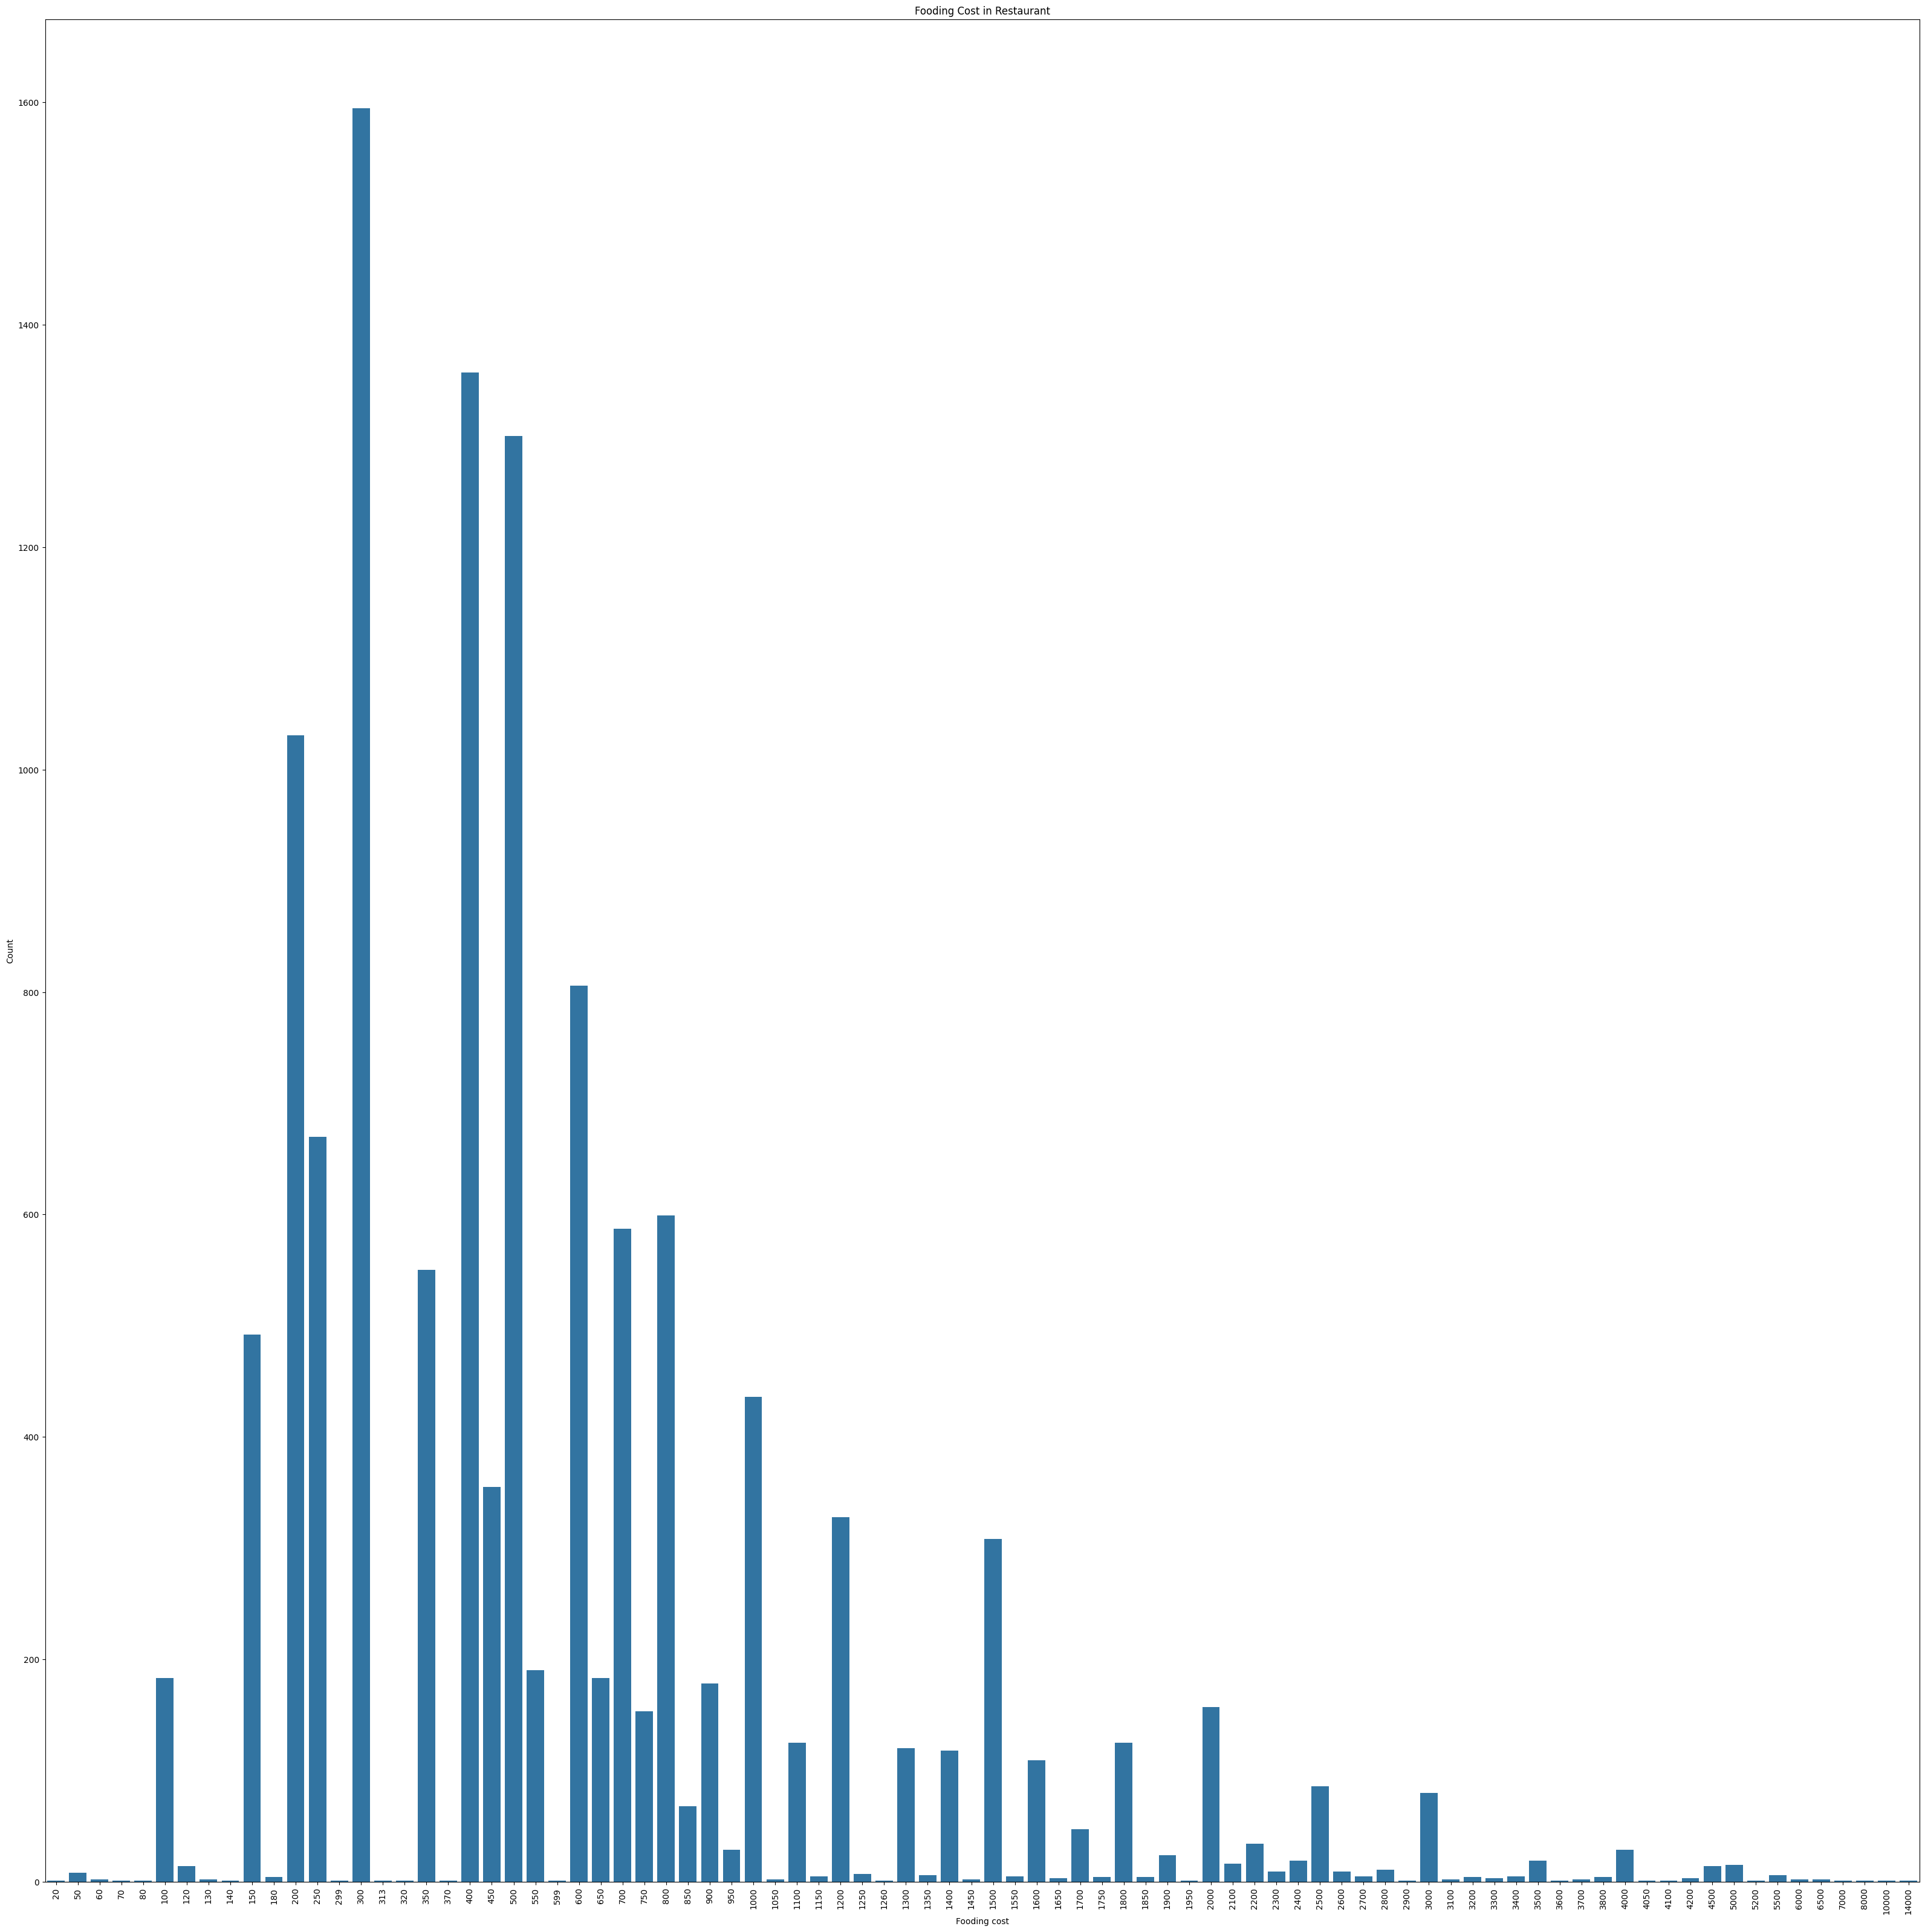

In [44]:
fig=plt.figure(figsize=(40,40))
sns.barplot(x=dftrn['COST'].value_counts().index, y=dftrn['COST'].value_counts())
plt.xlabel('Fooding cost')
plt.ylabel('Count')
plt.title('Fooding Cost in Restaurant')
plt.xticks(rotation=90)
plt.show()


 #Here from the above observation It is clear that majority of the restaurant have fooding cost 300 rupees among all the restaurant

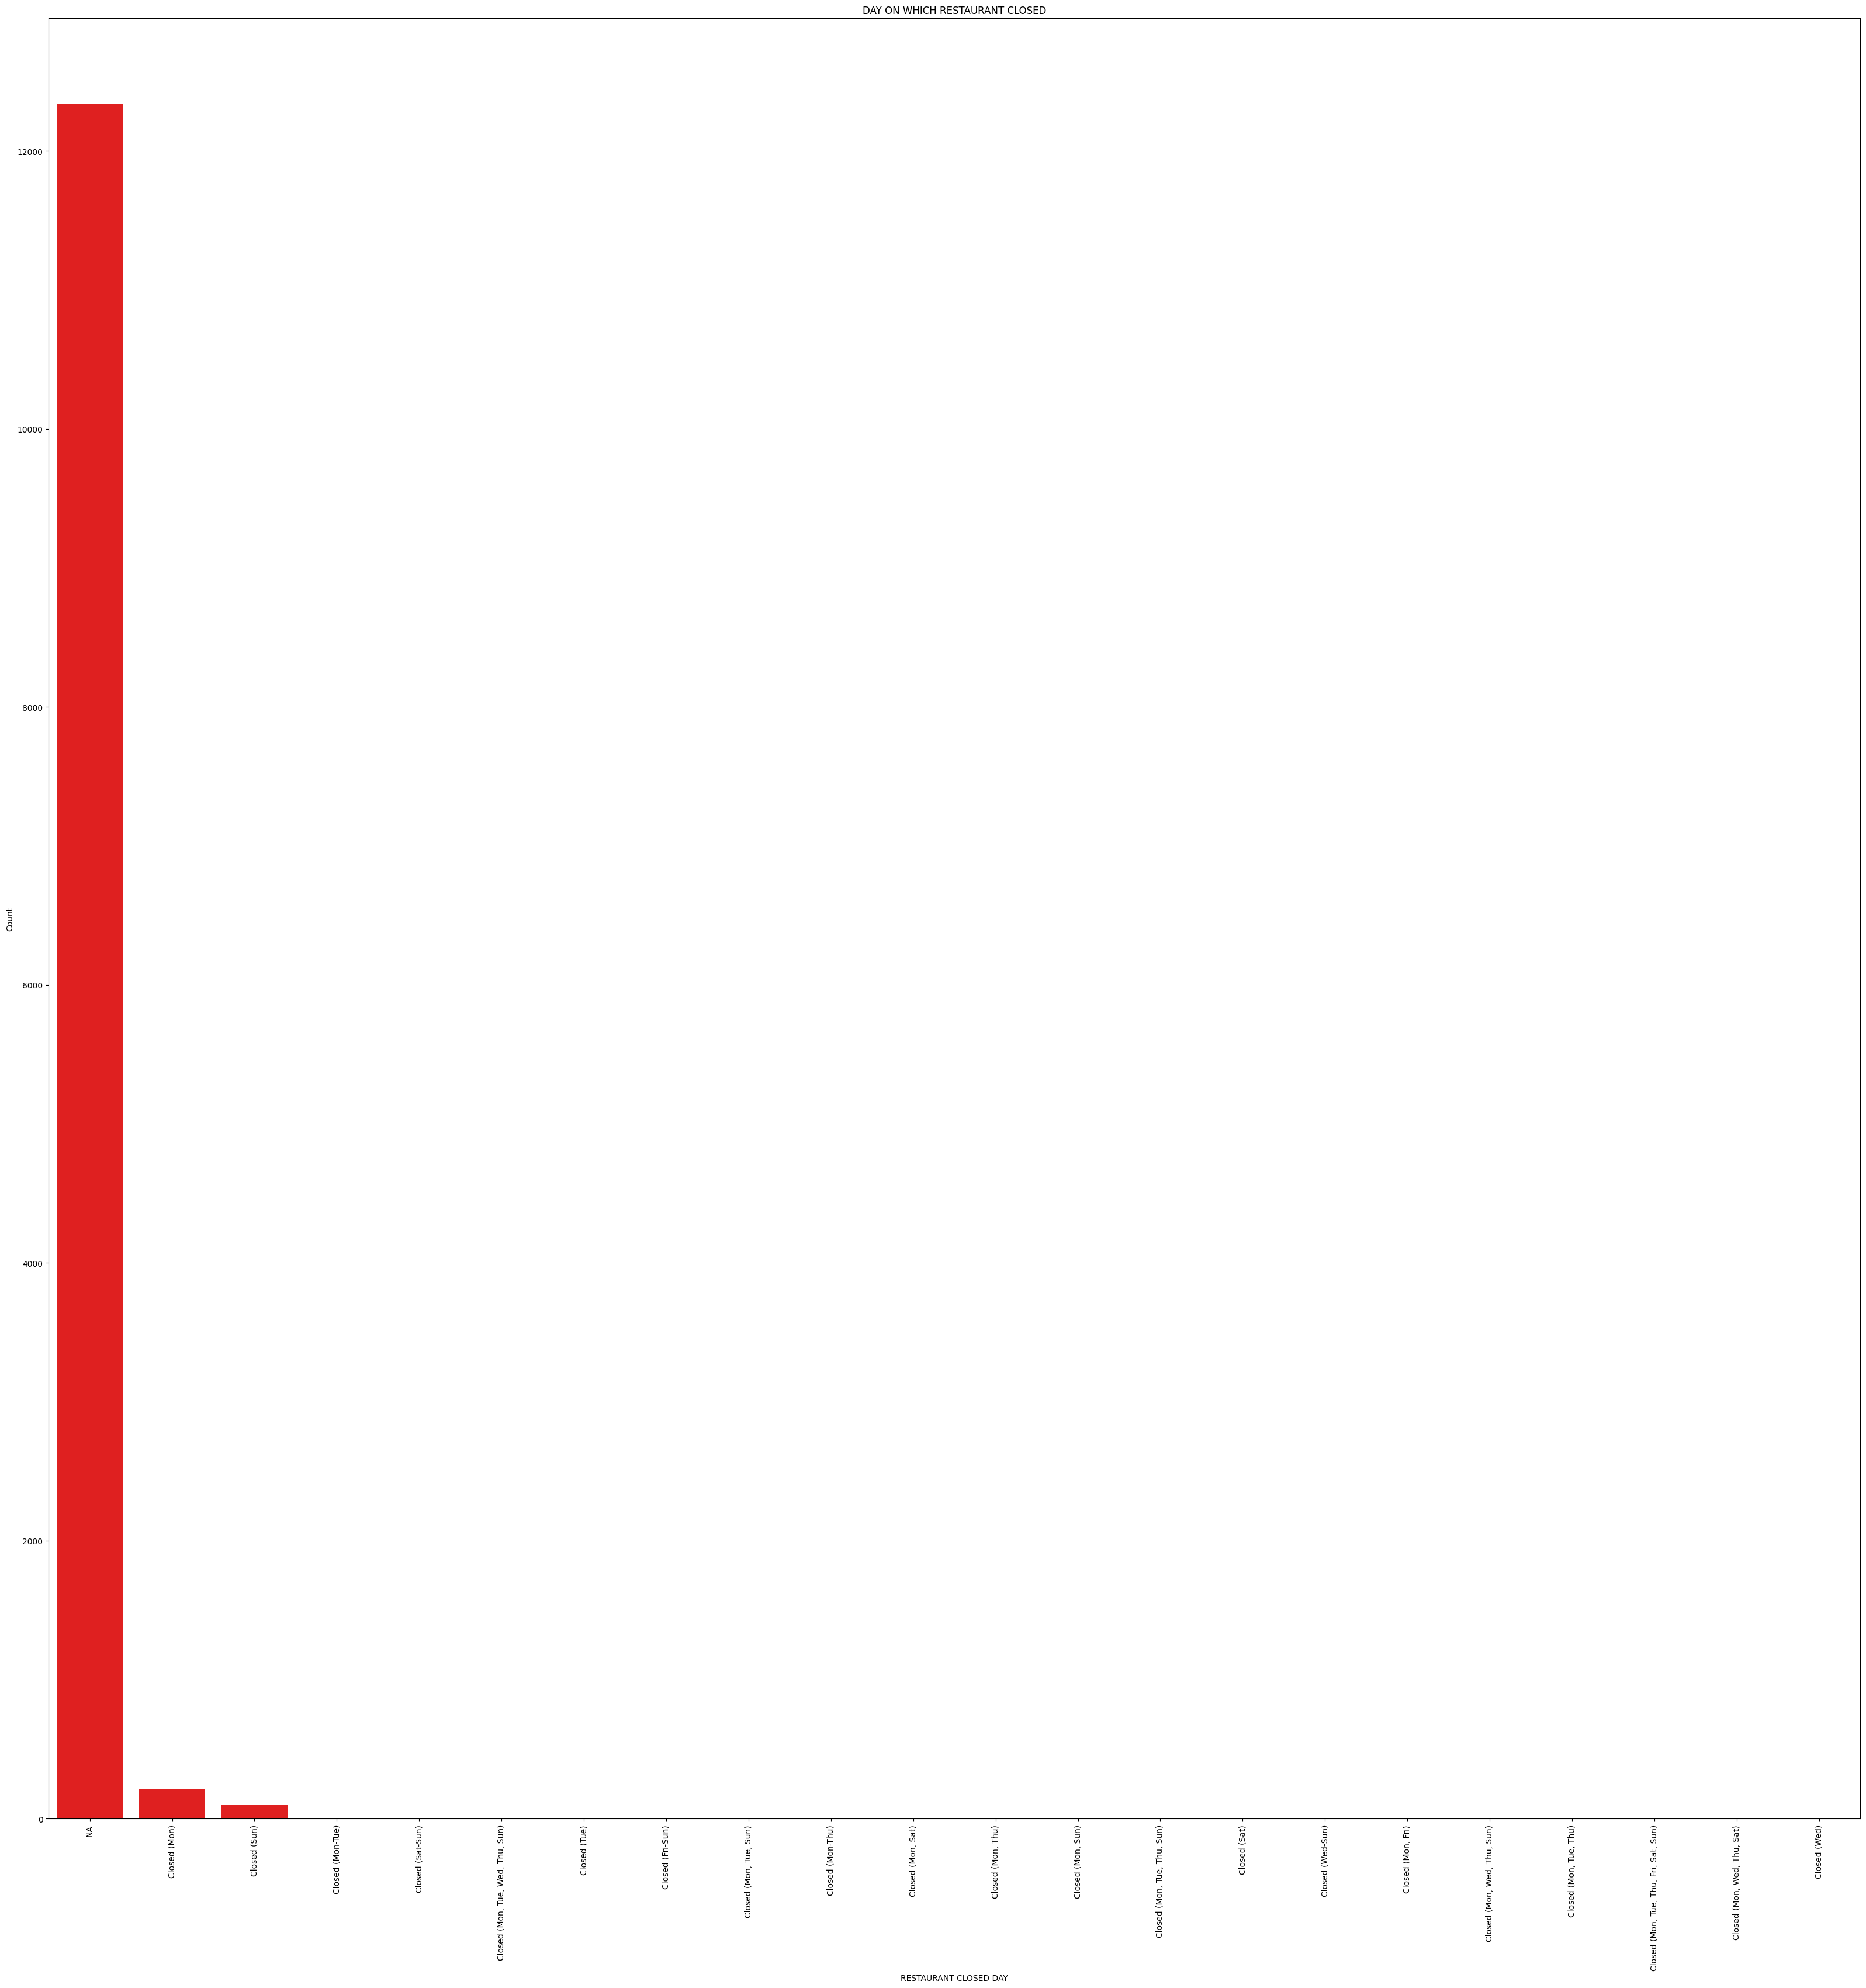

In [297]:
fig=plt.figure(figsize=(40,40))
sns.barplot(x=dftrn['CLOSED'].value_counts().index, y=dftrn['CLOSED'].value_counts(),color='red')
plt.xlabel('RESTAURANT CLOSED DAY')
plt.ylabel('Count')
plt.title('DAY ON WHICH RESTAURANT CLOSED')
plt.xticks(rotation=90)
plt.show()


# Here from the above observation it is clear that majority of the restaurant not closed on any day and their count is 12338 and count of restaurant closed on monday is211 and on sunday is 98 

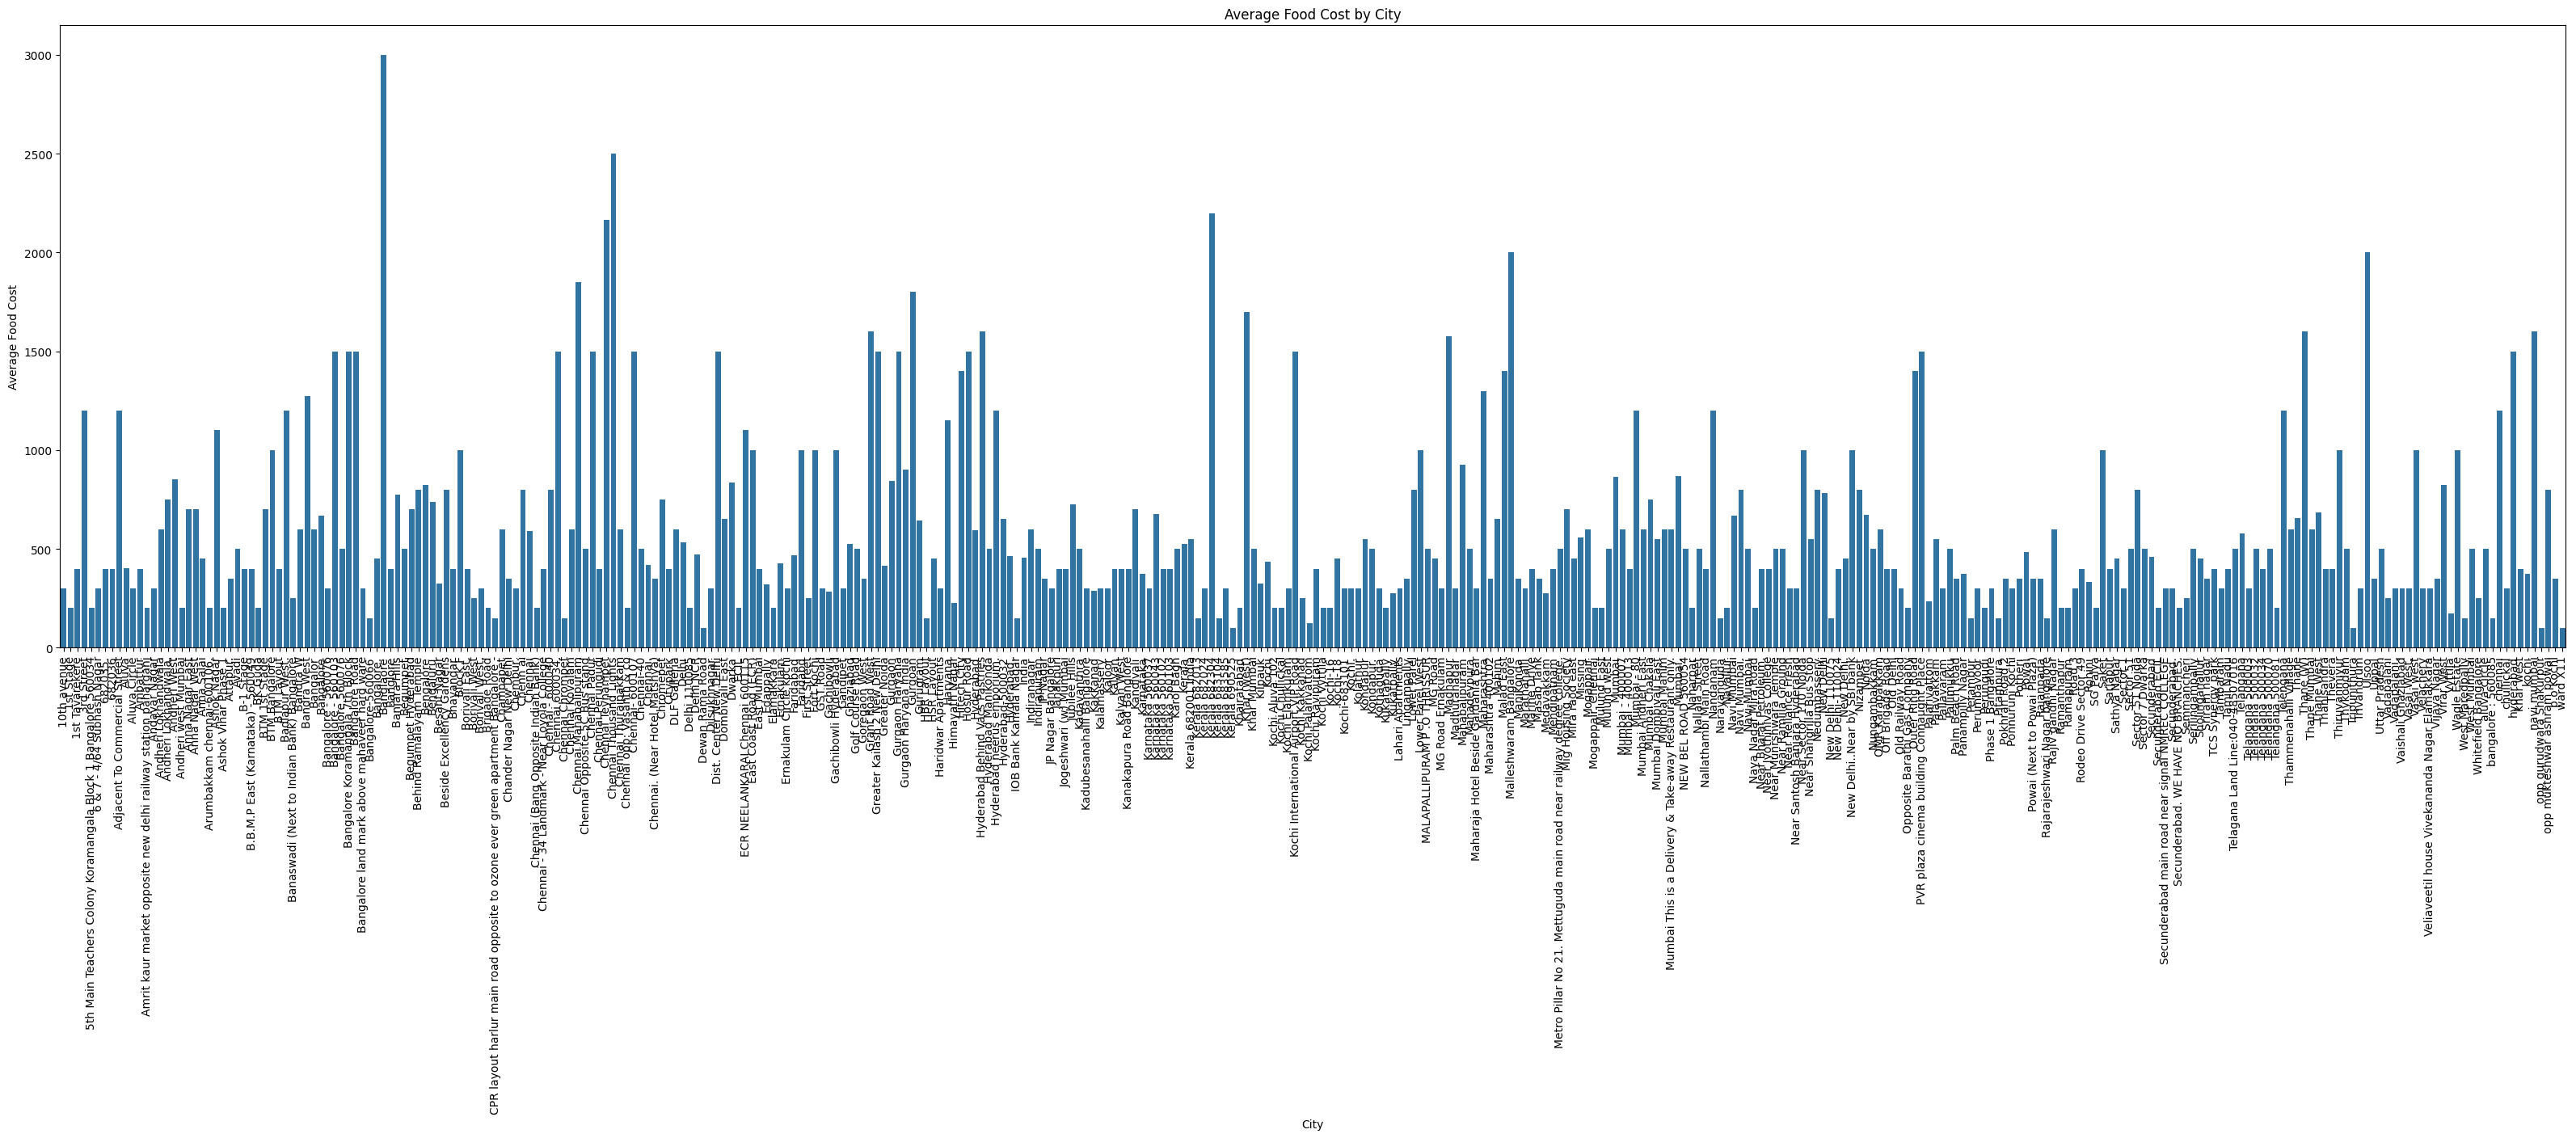

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt


avg_cost_by_city = dftrn.groupby('CITY')['COST'].mean().reset_index()

plt.figure(figsize=(40, 10))
sns.barplot(x='CITY', y='COST', data=avg_cost_by_city)
plt.xlabel('City')
plt.ylabel('Average Food Cost')
plt.title('Average Food Cost by City')
plt.xticks(rotation=90)  
plt.show()



In [72]:
plt.figure(figsize=(20,10))


<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [94]:
dftrn.groupby("RATING")['TITLE'].value_counts().sort_values(ascending=False)

RATING  TITLE                    
1.0     QUICK BITES                  535
3.7     QUICK BITES                  439
3.8     QUICK BITES                  423
3.9     CASUAL DINING                411
3.6     QUICK BITES                  402
                                    ... 
3.7     BAR,PUB                        1
        BAR,LOUNGE                     1
        BAKERY,CAFÉ                    1
3.6     SWEET SHOP,DESSERT PARLOR      1
4.9     PUB,MICROBREWERY               1
Name: count, Length: 885, dtype: int64

In [ ]:
#Here from the above observation  it is clear that maximum number Restaurant are having rating 1.0 

In [103]:
dftrn.groupby("CITY")['RATING'].mean().sort_values(ascending=False)

CITY
Malleshwaram Bangalore                  4.9
chennai                                 4.7
opp mukteshwar ashram powai             4.7
Chennai 600034.                         4.6
Hitech City                             4.6
                                       ... 
Kochi International Airport VIP Road    1.0
Kochi Elamkulam                         1.0
Thanisandra                             1.0
Kerala 682013                           1.0
Kerala 683104                           1.0
Name: RATING, Length: 360, dtype: float64

# here from the above observation it is clear that for the city Banglore averating rating is higher as compared to other city and obviously its the main factor for cost prediction

In [104]:
dftrn.groupby("TITLE")['CLOSED'].value_counts().sort_values(ascending=False)

TITLE                   CLOSED          
QUICK BITES             NA                  4080
CASUAL DINING           NA                  3590
Missing                 NA                   965
CAFÉ                    NA                   575
DESSERT PARLOR          NA                   372
                                            ... 
CAFÉ,BAKERY             Closed (Sun)           1
                        Closed (Wed)           1
FINE DINING,BAR         Closed (Mon)           1
FINE DINING             Closed (Mon-Tue)       1
SWEET SHOP,QUICK BITES  Closed (Sun)           1
Name: count, Length: 185, dtype: int64

#Here from  the above observation  it is clear that maximum number restaurants are giving 24X7 service to their customer like restaurant QUICK BITES and obvious and also the fooding cost is depend on this factor

In [53]:
dftrn

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,LOCAL_MEAN_RATING
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49,1200,3.392593
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30,1500,3.463043
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221,800,3.442857
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24,800,3.735714
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165,300,4.093750
...,...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546,500,3.686747
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214,1800,4.159259
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608,1300,3.842424
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32,400,3.500000


In [120]:
dftrn.groupby("CITY")['COST'].max().sort_values(ascending=False).head(100)

CITY
Bangalore                  14000
Mumbai                     10000
Hyderabad                   8000
New Delhi                   5500
Gurgaon                     5500
                           ...  
Chennai - 600040             800
Powai                        800
Navi Mumbai.                 800
Sector 51 Noida              800
Behind Ramalayam Temple      800
Name: COST, Length: 100, dtype: int64

In [ ]:
# here it is clear from the above observation that Restaurant Food cost is costlier in banglore as compared to other city

<Axes: xlabel='CITY'>

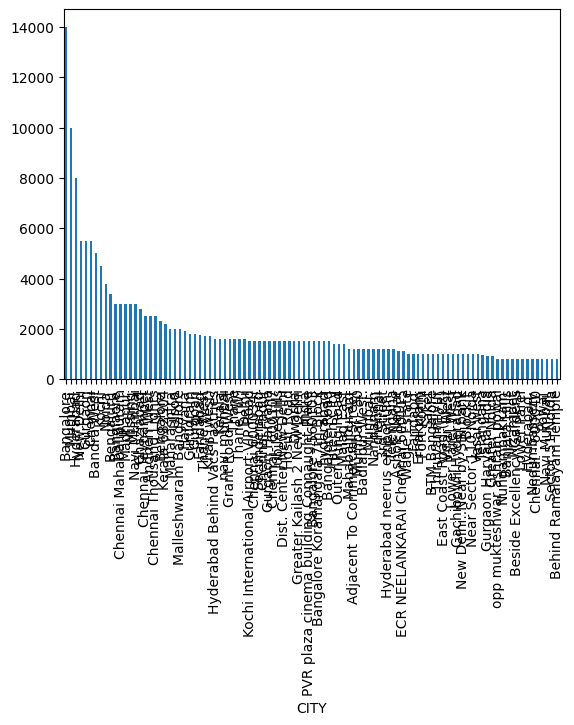

In [121]:
dftrn.groupby("CITY")['COST'].max().sort_values(ascending=False).head(100).plot(kind='bar')

In [128]:
dftrn.groupby(["LOCALITY",'CITY'])['COST'].min().sort_values(ascending=False).head(100)

LOCALITY                 CITY                          
Bandra Reclamation Dock  Bandra West                       5000
Dr. Zakir Hussain Marg   New Delhi                         5000
Bhikaji Cama Place       New Delhi                         4500
Mansingh Road            New Delhi                         4500
Aurangzeb Road           New Delhi                         4500
                                                           ... 
Belavali                 Badlapur West.                    1200
shop 7 shikrupa socity   Missing                           1200
Rathna Nagar             Nandanam                          1200
Sector 9                 Dwarka                            1100
359                      ECR NEELANKARAI Chennai 600115    1100
Name: COST, Length: 100, dtype: int64

#here from  the above observation it is clear that in MUMBAI BANDRA WEST the locality Bandra Reclamation Dock has minimum fooding cost is 5000 and minimum for chennai is 1100 

In [148]:
dftrn.drop('RESTAURANT_ID',axis=1,inplace=True)

In [111]:
dftrn

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,CLOSED,CITY_MEAN_RAT
0,31,9438,2627,739,320,Dombivali East,3.6,49.0,1200,not closed,3.390722
1,33,13198,289,1885,67,Ramapuram,4.2,30.0,1500,not closed,3.581785
2,31,10915,2976,661,67,Saligramam,3.8,221.0,800,not closed,3.581785
3,94,6346,4130,275,222,Bandra West,4.1,24.0,800,not closed,3.693844
4,50,15387,1766,615,222,Lower Parel,3.8,165.0,300,not closed,3.693844
...,...,...,...,...,...,...,...,...,...,...,...
12685,94,13228,2934,1144,131,Gachibowli,3.8,546.0,500,not closed,3.616557
12686,33,9686,2143,1177,222,Bandra Kurla Complex,4.3,1214.0,1800,not closed,3.693844
12687,71,11133,2088,1137,239,Vashi,4.0,608.0,1300,not closed,3.536364
12688,31,6134,3506,1837,67,Maduravoyal,3.5,32.0,400,not closed,3.581785


In [106]:
from sklearn.preprocessing import LabelEncoder

In [107]:
le=LabelEncoder()
dftrn["TITLE"]=le.fit_transform(dftrn["TITLE"])

In [108]:
dftrn["CUISINES"]=le.fit_transform(dftrn["CUISINES"])

In [109]:
dftrn["TIME"]=le.fit_transform(dftrn["TIME"])

In [112]:
dftrn["CITY"]=le.fit_transform(dftrn["CITY"])

In [113]:
dftrn["LOCALITY"]=le.fit_transform(dftrn["LOCALITY"])

In [114]:
dftrn["CLOSED"]=le.fit_transform(dftrn["CLOSED"])

In [173]:
dftrn['VOTES'] =dftrn['VOTES'].astype(float)

In [63]:
#dftrn['VOTES']=le.fit_transform(dftrn['VOTES'])

In [115]:
dftrn.dtypes

TITLE              int32
RESTAURANT_ID      int64
CUISINES           int32
TIME               int32
CITY               int64
LOCALITY           int32
RATING           float64
VOTES            float64
COST               int64
CLOSED             int32
CITY_MEAN_RAT    float64
dtype: object

TITLE                Axes(0.125,0.77;0.110714x0.11)
RESTAURANT_ID     Axes(0.257857,0.77;0.110714x0.11)
CUISINES          Axes(0.390714,0.77;0.110714x0.11)
TIME              Axes(0.523571,0.77;0.110714x0.11)
CITY              Axes(0.656429,0.77;0.110714x0.11)
LOCALITY          Axes(0.789286,0.77;0.110714x0.11)
RATING              Axes(0.125,0.638;0.110714x0.11)
VOTES            Axes(0.257857,0.638;0.110714x0.11)
COST             Axes(0.390714,0.638;0.110714x0.11)
CLOSED           Axes(0.523571,0.638;0.110714x0.11)
CITY_MEAN_RAT    Axes(0.656429,0.638;0.110714x0.11)
dtype: object

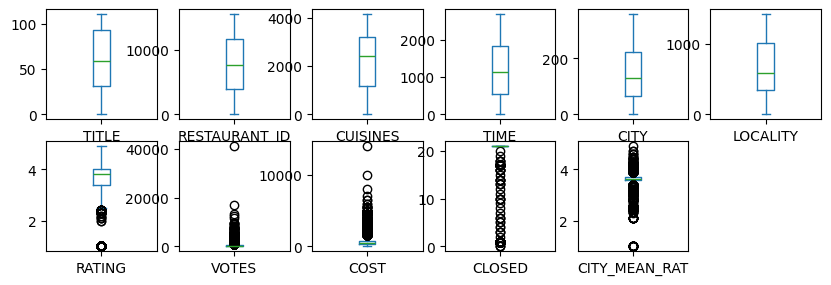

In [116]:
dftrn.plot(kind='box',subplots=True,layout=(6,6),figsize=(10,10))

In [117]:
Q1=dftrn['CLOSED'].quantile(0.25)
Q2=dftrn['CLOSED'].quantile(0.5)
Q3=dftrn['CLOSED'].quantile(0.75)
iqr=Q3-Q1
lowfence=Q1-1.5*iqr
uppfence=Q3+1.5*iqr
print(lowfence)
print(uppfence)


21.0
21.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1f695319bd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f69531afd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f6953192d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f695328050>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f6953288d0>],
 'means': []}

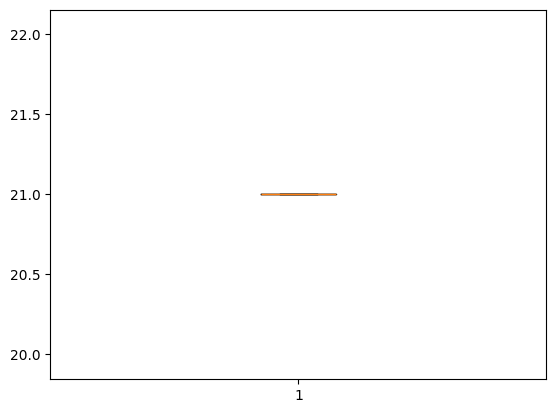

In [118]:
from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'CLOSED':21.0},max_capping_dict={'CLOSED':21.0})
dftrn[['CLOSED']]=arb.fit_transform(dftrn[['CLOSED']])
plt.boxplot(dftrn['CLOSED'])


In [120]:
Q1=dftrn['CITY_MEAN_RAT'].quantile(0.25)
Q2=dftrn['CITY_MEAN_RAT'].quantile(0.5)
Q3=dftrn['CITY_MEAN_RAT'].quantile(0.75)
iqr=Q3-Q1
lowfence=Q1-1.5*iqr
uppfence=Q3+1.5*iqr
print(lowfence)
print(uppfence)


3.4136952710044906
3.861933824621463


{'whiskers': [<matplotlib.lines.Line2D at 0x1f694eecfd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f694eee490>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f694eec390>],
 'medians': [<matplotlib.lines.Line2D at 0x1f694eefcd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f694f1c410>],
 'means': []}

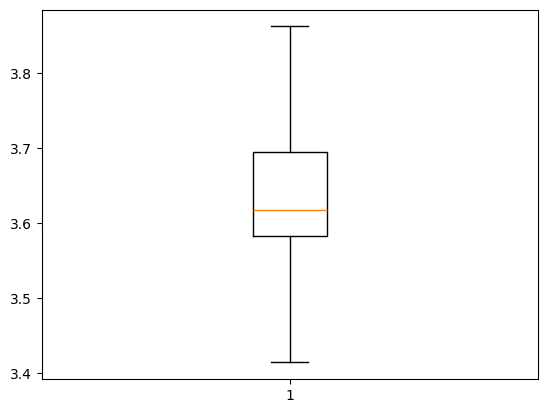

In [121]:
from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'CITY_MEAN_RAT':3.4136952710044906},max_capping_dict={'CITY_MEAN_RAT':3.861933824621463})
dftrn[['CITY_MEAN_RAT']]=arb.fit_transform(dftrn[['CITY_MEAN_RAT']])
plt.boxplot(dftrn['CITY_MEAN_RAT'])


In [212]:
Q1=dftrn['LOCAL_MEAN_RATING'].quantile(0.25)
Q2=dftrn['LOCAL_MEAN_RATING'].quantile(0.5)
Q3=dftrn['LOCAL_MEAN_RATING'].quantile(0.75)
iqr=Q3-Q1
lowfence=Q1-1.5*iqr
uppfence=Q3+1.5*iqr
print(lowfence)
print(uppfence)


2.7555944055944055
4.494522144522144


{'whiskers': [<matplotlib.lines.Line2D at 0x1766eaa4cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1766eaa6090>,
 'boxes': [<matplotlib.lines.Line2D at 0x1766ea5f590>],
 'medians': [<matplotlib.lines.Line2D at 0x1766eaa7290>],
 'fliers': [<matplotlib.lines.Line2D at 0x1766eaa7b90>],
 'means': []}

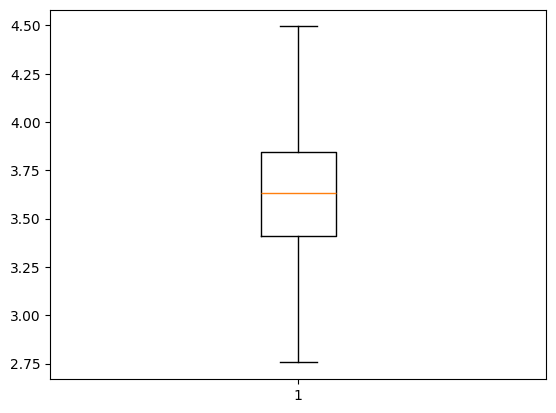

In [213]:
from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'LOCAL_MEAN_RATING':2.7555944055944055},max_capping_dict={'LOCAL_MEAN_RATING':4.494522144522144})
dftrn[['LOCAL_MEAN_RATING']]=arb.fit_transform(dftrn[['LOCAL_MEAN_RATING']])
plt.boxplot(dftrn['LOCAL_MEAN_RATING'])


In [122]:
Q1=dftrn['VOTES'].quantile(0.25)
Q2=dftrn['VOTES'].quantile(0.5)
Q3=dftrn['VOTES'].quantile(0.75)
iqr=Q3-Q1
lowfence=Q1-1.5*iqr
uppfence=Q3+1.5*iqr
print(lowfence)
print(uppfence)


-466.00335190666897
944.6722531777816


{'whiskers': [<matplotlib.lines.Line2D at 0x1f694f1e990>,
 'caps': [<matplotlib.lines.Line2D at 0x1f694f3c6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f69532a150>],
 'medians': [<matplotlib.lines.Line2D at 0x1f694f3d890>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f694f3e110>],
 'means': []}

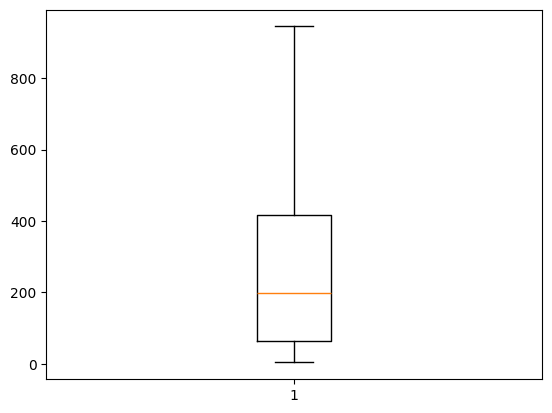

In [123]:
from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'VOTES':-466.00335190666897},max_capping_dict={'VOTES':944.6722531777816})
dftrn[['VOTES']]=arb.fit_transform(dftrn[['VOTES']])
plt.boxplot(dftrn['VOTES'])


In [124]:
Q1=dftrn['RATING'].quantile(0.25)
Q2=dftrn['RATING'].quantile(0.5)
Q3=dftrn['RATING'].quantile(0.75)
iqr=Q3-Q1
lowfence=Q1-1.5*iqr
uppfence=Q3+1.5*iqr
print(lowfence)
print(uppfence)


2.5
4.9


{'whiskers': [<matplotlib.lines.Line2D at 0x1f694f8de90>,
 'caps': [<matplotlib.lines.Line2D at 0x1f694f8f190>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f694f8d550>],
 'medians': [<matplotlib.lines.Line2D at 0x1f694f98190>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f694f98b10>],
 'means': []}

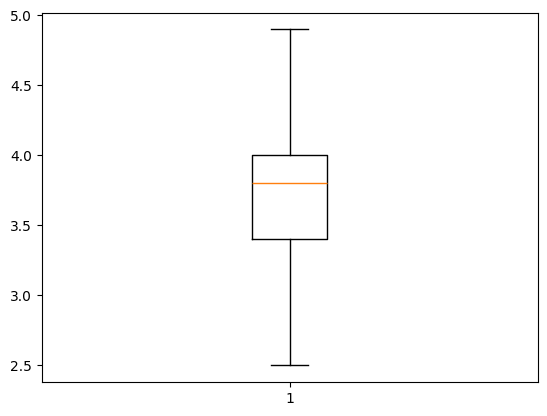

In [125]:
from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'RATING':2.5},max_capping_dict={'RATING':4.9})
dftrn[['RATING']]=arb.fit_transform(dftrn[['RATING']])
plt.boxplot(dftrn['RATING'])


TITLE                    Axes(0.125,0.77;0.110714x0.11)
RESTAURANT_ID         Axes(0.257857,0.77;0.110714x0.11)
CUISINES              Axes(0.390714,0.77;0.110714x0.11)
TIME                  Axes(0.523571,0.77;0.110714x0.11)
RATING                Axes(0.656429,0.77;0.110714x0.11)
VOTES                 Axes(0.789286,0.77;0.110714x0.11)
COST                    Axes(0.125,0.638;0.110714x0.11)
LOCATION             Axes(0.257857,0.638;0.110714x0.11)
CLOSED               Axes(0.390714,0.638;0.110714x0.11)
LOCATION_MEAN_RAT    Axes(0.523571,0.638;0.110714x0.11)
dtype: object

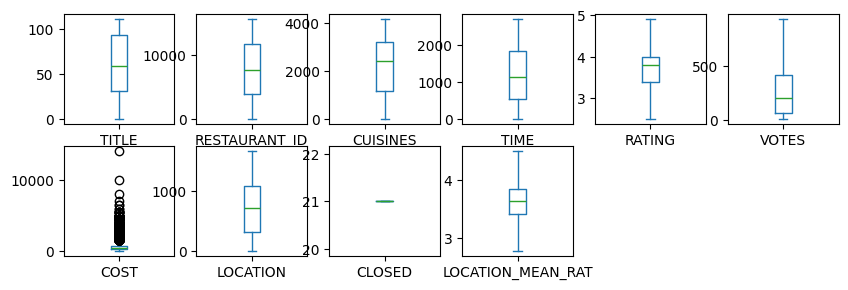

In [365]:
dftrn.plot(kind='box',subplots=True,layout=(6,6),figsize=(10,10))

In [132]:
dftrn.drop(['CLOSED','RESTAURANT_ID'],axis=1,inplace=True)

In [133]:
correlation=dftrn.corr()

<Axes: >

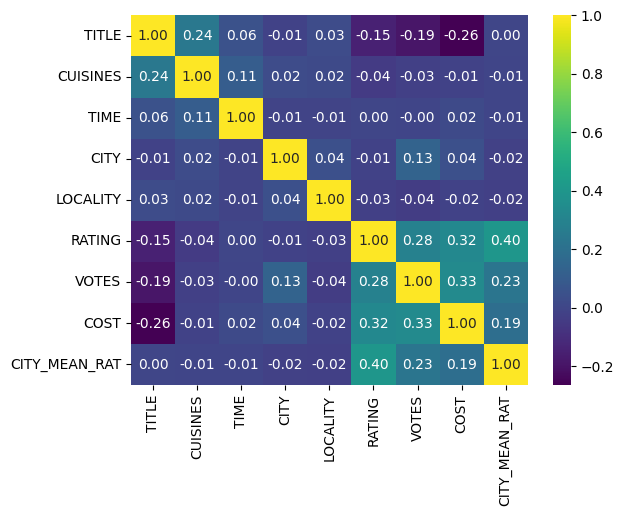

In [134]:
sns.heatmap(correlation,cmap='viridis',annot=True,fmt='.2f')


In [ ]:
#Here from the above Correlation we observed that cost is negativel correlated with closed feature 
# cost is positively correlated with city it means in Metro city Restaurnt food cost will increase
# cost is also negatively correlated with locality it means Restaurent fooding cost is also depend on locality
# Rating is also positively correlated with cost if rating increases Restaurant fooding cost also increases


In [136]:
dftrn

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,CITY_MEAN_RAT
0,31,2627,739,320,285,3.6,49.000000,1200,3.413695
1,33,289,1885,67,1046,4.2,30.000000,1500,3.581785
2,31,2976,661,67,1101,3.8,221.000000,800,3.581785
3,94,4130,275,222,136,4.1,24.000000,800,3.693844
4,50,1766,615,222,620,3.8,165.000000,300,3.693844
...,...,...,...,...,...,...,...,...,...
12685,94,2934,1144,131,342,3.8,546.000000,500,3.616557
12686,33,2143,1177,222,133,4.3,944.672253,1800,3.693844
12687,71,2088,1137,239,1342,4.0,608.000000,1300,3.536364
12688,31,3506,1837,67,631,3.5,32.000000,400,3.581785


In [135]:
#Separating Independent features and dependent Feature in x and y
x=dftrn.drop('COST',axis=1)

In [352]:
x

,TITLE,RESTAURANT_ID,CUISINES,TIME,RATING,VOTES,LOCATION,CLOSED,LOCATION_MEAN_RAT
0,31,9438,2627,739,3.6,49.000000,1587,21,2.916667
1,33,13198,289,1885,4.2,30.000000,397,21,3.463043
2,31,10915,2976,661,3.8,221.000000,402,21,3.442857
3,94,6346,4130,275,4.1,24.000000,1034,21,3.735714
4,50,15387,1766,615,3.8,165.000000,1092,21,4.093750
...,...,...,...,...,...,...,...,...,...
12685,94,13228,2934,1144,3.8,546.000000,695,21,3.684848
12686,33,9686,2143,1177,4.3,943.172253,1033,21,4.159259
12687,71,11133,2088,1137,4.0,608.000000,1192,21,3.875000
12688,31,6134,3506,1837,3.5,32.000000,336,21,3.500000


In [137]:
y=dftrn.iloc[:,-2]

In [138]:
y

0        1200
1        1500
2         800
3         800
4         300
         ... 
12685     500
12686    1800
12687    1300
12688     400
12689     600
Name: COST, Length: 12665, dtype: int64

In [139]:
from sklearn.preprocessing import StandardScaler
    # here i am performing scaling on input Features in a x variable
scal_data=StandardScaler()
x=pd.DataFrame(scal_data.fit_transform(x),columns=x.columns)

In [140]:
x

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,CITY_MEAN_RAT
0,-0.871300,0.325631,-0.584977,2.119505,-0.920737,-0.116780,-0.876551,-2.002993
1,-0.810504,-1.616088,0.933874,-0.896520,0.986019,0.975762,-0.940504,-0.416052
2,-0.871300,0.615477,-0.688354,-0.896520,1.123827,0.247401,-0.297613,-0.416052
3,1.043762,1.573880,-1.199940,0.951242,-1.294071,0.793672,-0.960699,0.641908
4,-0.293741,-0.389433,-0.749321,0.951242,-0.081364,0.247401,-0.486105,0.641908
...,...,...,...,...,...,...,...,...
12660,1.043762,0.580596,-0.048210,-0.133573,-0.777919,0.247401,0.796310,-0.087769
12661,-0.810504,-0.076333,-0.004474,0.951242,-1.301588,1.157852,2.138209,0.641908
12662,0.344612,-0.122011,-0.057488,1.153900,1.727675,0.611581,1.004997,-0.844875
12663,-0.871300,1.055645,0.870257,-0.896520,-0.053802,-0.298870,-0.933772,-0.416052


In [141]:
x.skew()

TITLE           -0.079694
CUISINES        -0.218312
TIME             0.305681
CITY             0.267921
LOCALITY         0.352353
RATING          -0.732154
VOTES            1.002840
CITY_MEAN_RAT   -0.572757
dtype: float64

In [189]:
x=x.apply(np.cbrt)

In [228]:
x.skew()

TITLE               -0.079665
CUISINES            -0.218782
TIME                 0.306186
CITY                 0.266332
LOCALITY             0.352317
RATING              -0.732878
VOTES                1.215748
CLOSED               0.000000
CITY_MEAN_RAT       -0.573689
LOCAL_MEAN_RATING   -0.767154
dtype: float64

In [191]:
x['CLOSED']=x['CLOSED'].apply(np.cbrt)

In [229]:
x.skew()

TITLE               -0.079665
CUISINES            -0.218782
TIME                 0.306186
CITY                 0.266332
LOCALITY             0.352317
RATING              -0.732878
VOTES                1.215748
CLOSED               0.000000
CITY_MEAN_RAT       -0.573689
LOCAL_MEAN_RATING   -0.767154
dtype: float64

In [142]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

,vif values,features
0,1.123803,TITLE
1,1.073929,CUISINES
2,1.012737,TIME
3,1.024865,CITY
4,1.004582,LOCALITY
5,1.272496,RATING
6,1.164916,VOTES
7,1.223405,CITY_MEAN_RAT


# here from the above vif values it is clear multi collinearity is not present as all the features have vif value in acceptable range -5 to +5

In [341]:
x.drop(['LOCATION_MEAN_RAT'],axis=1,inplace=True)

In [325]:
x['CLOSED'].isnull().sum()

0

In [143]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

,vif values,features
0,1.123803,TITLE
1,1.073929,CUISINES
2,1.012737,TIME
3,1.024865,CITY
4,1.004582,LOCALITY
5,1.272496,RATING
6,1.164916,VOTES
7,1.223405,CITY_MEAN_RAT


In [144]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [145]:
mxac=0
mxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>mxac:
        mxac=acc
        mxrs=i
print('maximum r2 score is',mxac,'at random state',mxrs)

maximum r2 score is 0.2433109173354634 at random state 165


In [147]:
en=ElasticNet()
en.fit(x_train,y_train)
rdpred_test=en.predict(x_test)
rdpred_train=en.predict(x_train)
print('R2_score',r2_score(y_test,rdpred_test)*100)
print('R2 score on training data',r2_score(y_train,rdpred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,rdpred_test))
print('Mean Squared  Error',mean_squared_error(y_test,rdpred_test))
print('Root Mean Absolute Error',np.sqrt(mean_squared_error(y_test,rdpred_test)))
print('cross validation score',cross_val_score(en,x,y,cv=5,scoring='r2').mean()*100)

R2_score 19.832197515508355
R2 score on training data 18.715269452750437
Mean Absolute Error 333.0179680294043
Mean Squared  Error 325792.60615481256
Root Mean Absolute Error 570.7824508118769
cross validation score 19.313763347917273


In [370]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbrpred_test=gbr.predict(x_test)
gbrpred_train=gbr.predict(x_train)
print('R2_score',r2_score(y_test,gbrpred_test))
print('R2 score on training data',r2_score(y_train,gbrpred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,gbrpred_test))
print('Mean Squared  Error',mean_squared_error(y_test,gbrpred_test))
print('Root Mean Absolute Error',np.sqrt(mean_squared_error(y_test,gbrpred_test)))
print('cross validation score',cross_val_score(gbr,x,y,cv=5,scoring='r2').mean()*100)

R2_score 0.7111168458732622
R2 score on training data 74.06435374931189
Mean Absolute Error 203.73035204680397
Mean Squared  Error 111298.36721721948
Root Mean Absolute Error 333.61409924824744
cross validation score 70.65683507197834


In [148]:
svr=SVR()
svr.fit(x_train,y_train)
svrpred_test=svr.predict(x_test)
svrpred_train=svr.predict(x_train)
print('R2_score',r2_score(y_test,svrpred_test)*100)
print('R2 score on training data',r2_score(y_train,svrpred_train))
print('Mean Absolute Error',mean_absolute_error(y_test,svrpred_test))
print('Mean Squared  Error',mean_squared_error(y_test,svrpred_test))
print('Root Mean Absolute Error',np.sqrt(mean_squared_error(y_test,svrpred_test)))
print('cross validation score',cross_val_score(svr,x,y,cv=5,scoring='r2').mean()*100)



R2_score 8.170582592025276
R2 score on training data 0.09543895422489257
Mean Absolute Error 316.84414791028786
Mean Squared  Error 373184.0501030282
Root Mean Absolute Error 610.8879194279652
cross validation score 10.577692284312546


In [86]:
DecisionTreeRegressor

sklearn.tree._classes.DecisionTreeRegressor

In [348]:
dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_train)
dtcpred_test=dtc.predict(x_test)

dtcpred_train=dtc.predict(x_train)
print('R2_score',r2_score(y_test,dtcpred_test)*100)
print('R2 score on training data',r2_score(y_train,dtcpred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,dtcpred_test))
print('Mean Squared  Error',mean_squared_error(y_test,dtcpred_test))
print('Root Mean Absolute Error',np.sqrt(mean_squared_error(y_test,dtcpred_test)))
print('cross validation score',cross_val_score(dtc,x,y,cv=5,scoring='r2').mean()*100)



R2_score 40.87621837877459
R2 score on training data 100.0
Mean Absolute Error 264.2448121880746
Mean Squared  Error 227786.91883372734
Root Mean Absolute Error 477.27027859874886
cross validation score 50.82844517854951


In [149]:
etc=ExtraTreesRegressor()
etc.fit(x_train,y_train)
etcpred_test=etc.predict(x_test)
etcpred_train=etc.predict(x_train)
print('R2_score',r2_score(y_test,etcpred_test)*100)
print('R2 score on training data',r2_score(y_train,etcpred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,etcpred_test))
print('Mean Squared  Error',mean_squared_error(y_test,etcpred_test))
print('Root Mean Absolute Error',np.sqrt(mean_squared_error(y_test,etcpred_test)))
print('cross validation score',cross_val_score(etc,x,y,cv=5,scoring='r2').mean()*100)



R2_score 72.77255082800296
R2 score on training data 99.99920400119234
Mean Absolute Error 206.68875
Mean Squared  Error 110649.18021681579
Root Mean Absolute Error 332.63971533299474
cross validation score 70.29382016337443


# from the above observation Except GradientBoostingRegressor all other Algorithm are not performing well so i will select Gradient Boosting Regressor because there is very less difference between training score and cross validation score

In [150]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

model = GradientBoostingRegressor()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [151]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [157]:
final_model=GradientBoostingRegressor(learning_rate=0.1,max_depth=5,n_estimators=100)

final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
accuracy=r2_score(y_test,pred)
score=cross_val_score(final_model,x_test,y_test)
print(score.mean()*100)
print(accuracy*100)
print('differnce between r2_score and cross_val score ',accuracy-score.mean())

72.79457806102411
74.96813076994083
differnce between r2_score and cross_val score  0.02173552708916715


In [231]:
import joblib
joblib.dump(final_model,'Restaurant_food_cost.pkl')

['Restaurant_food_cost.pkl']

In [ ]:
            EDA ,PREPROCESSING AND FEATURE ENGINEERING FOR TEST FILE

In [158]:
dftst=pd.read_excel('Data_Test.xlsx')


In [159]:
dftst

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,NaN,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,NaN,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [161]:

dftst.dtypes


TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
dtype: object

In [162]:
dftst.shape

(4231, 8)

In [163]:
dftst.isnull().sum()

TITLE            284
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [167]:
dftst.duplicated().sum()

0

In [166]:
#Removing Duplicate values  from the feature
dftst.drop_duplicates(inplace=True)


In [168]:
dftst['RATING'] = dftst['RATING'].str.replace('NEW', '1')
dftst['RATING'] = dftst['RATING'].str.replace('-', '1').astype(float)


In [169]:
# replacing  the string votes in the votes feature with non space character 
dftst['VOTES']=dftst['VOTES'].str.replace('votes',"")

dftst['VOTES']=dftst['VOTES'].astype(float)


In [170]:
dftst

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564.0
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61.0
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350.0
3,NaN,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445.0
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23.0
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287.0
4227,NaN,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469.0
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53.0
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,1.0,NaN


<Axes: >

<Figure size 1000x600 with 0 Axes>

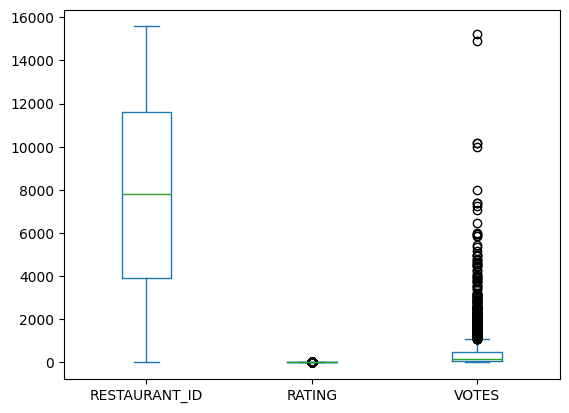

In [171]:
plt.figure(figsize=(10,6))
dftst.plot(kind='box')


In [172]:
import re
def check_closed(time):
    a = re.findall('Closed \(.*?\)', time)
    if a != []:
        return a[0]
    else:
        return 'NA'


In [173]:
dftst['CLOSED'] = dftst['TIME'].apply(check_closed)

In [174]:
dftst

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,CLOSED
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564.0,NA
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61.0,NA
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350.0,NA
3,NaN,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445.0,NA
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23.0,NA
...,...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287.0,NA
4227,NaN,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469.0,NA
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53.0,NA
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,1.0,NaN,NA


In [175]:
dftst['CLOSED']=dftst['CLOSED'].str.replace('NA','not closed')

<Axes: xlabel='CLOSED'>

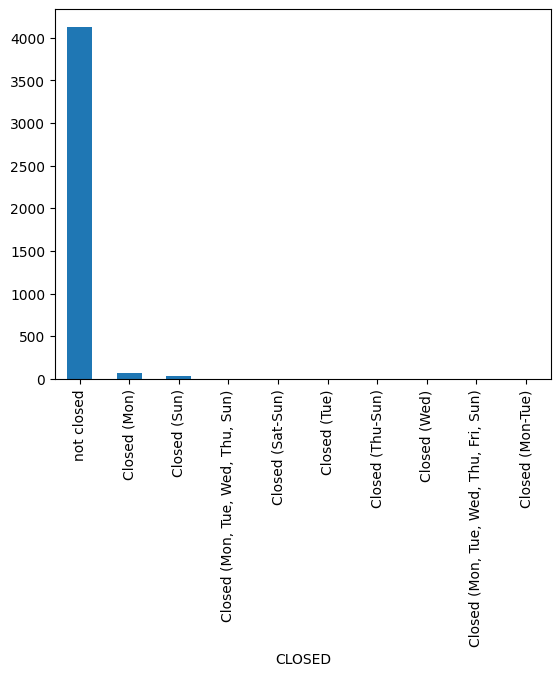

In [176]:
dftst['CLOSED'].value_counts().plot(kind='bar')

In [178]:
dftst.groupby(['LOCALITY'])['RATING'].mean()

LOCALITY
(ground floor of Sunrise Chambers)                     4.2
16th cross                                             4.0
17 Malaviya Avenue                                     3.8
20/718 (Old No 12/275) Railway Station Road Aluva      4.1
2nd Stage                                              3.3
                                                      ... 
kadubeesanahalli                                       3.5
kakkanad                                               3.0
lane besides to King’s Burger. Next to nellore mess    3.7
phase 3                                                3.4
sholinganallur                                         2.9
Name: RATING, Length: 834, dtype: float64

In [179]:

dftst.groupby(['RATING'])['VOTES'].value_counts().head(50)

RATING  VOTES
2.1     579.0    1
2.2     119.0    1
        243.0    1
2.3     55.0     1
        133.0    1
        173.0    1
        208.0    1
        301.0    1
2.4     19.0     1
        32.0     1
        35.0     1
        64.0     1
        69.0     1
        93.0     1
        120.0    1
        315.0    1
        344.0    1
2.5     93.0     3
        143.0    2
        22.0     1
        28.0     1
        44.0     1
        115.0    1
        117.0    1
        120.0    1
        139.0    1
        162.0    1
        190.0    1
        265.0    1
        460.0    1
2.6     60.0     2
        17.0     1
        18.0     1
        29.0     1
        33.0     1
        42.0     1
        44.0     1
        55.0     1
        59.0     1
        62.0     1
        81.0     1
        87.0     1
        94.0     1
        102.0    1
        107.0    1
        119.0    1
        215.0    1
        333.0    1
        338.0    1
        360.0    1
Name: count, dtype: int64

In [181]:

dftst.TITLE.unique()

array(['CASUAL DINING', 'QUICK BITES', nan, 'FOOD TRUCK,DESSERT PARLOR',
       'DESSERT PARLOR,QUICK BITES', 'CASUAL DINING,BAR', 'LOUNGE',
       'BEVERAGE SHOP', 'CASUAL DINING,PUB', 'DESSERT PARLOR', 'PUB',
       'CAFÉ', 'BAKERY', 'LOUNGE,BAR', 'BAKERY,QUICK BITES', 'SWEET SHOP',
       'SWEET SHOP,QUICK BITES', 'BEVERAGE SHOP,QUICK BITES',
       'CAFÉ,QUICK BITES', 'DHABA', 'QUICK BITES,DESSERT PARLOR',
       'FINE DINING', 'IRANI CAFE,BAKERY', 'PUB,CASUAL DINING',
       'BAKERY,CASUAL DINING', 'BAR', 'FOOD COURT',
       'QUICK BITES,SWEET SHOP', 'CAFÉ,BAR', 'BAR,PUB',
       'BAKERY,DESSERT PARLOR', 'KIOSK', 'CAFÉ,BAKERY',
       'CASUAL DINING,BAKERY', 'BAKERY,CAFÉ', 'CASUAL DINING,CAFÉ',
       'QUICK BITES,CAFÉ', 'MESS', 'BAR,CASUAL DINING',
       'BEVERAGE SHOP,CAFÉ', 'BEVERAGE SHOP,DESSERT PARLOR',
       'PUB,FINE DINING', 'CASUAL DINING,FOOD COURT',
       'CAFÉ,CASUAL DINING', 'LOUNGE,CASUAL DINING',
       'DESSERT PARLOR,CAFÉ', 'FINE DINING,BAR',
       'CASUAL DI

In [184]:
city_mean=dftst.groupby(['CITY'])['RATING'].mean()
city_mean.columns=['CITY','CITY_RATING_MEAN']
dftst = dftst.merge(city_mean, on=['CITY'],how='left')


In [185]:
dftst

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING_x,VOTES,CLOSED,RATING_y
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564.0,not closed,3.546032
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61.0,not closed,3.708844
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350.0,not closed,3.708844
3,NaN,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445.0,not closed,3.573333
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23.0,not closed,2.426170
...,...,...,...,...,...,...,...,...,...,...
4225,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287.0,not closed,3.741339
4226,NaN,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469.0,not closed,3.695190
4227,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53.0,not closed,3.573333
4228,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,1.0,NaN,not closed,2.426170


In [186]:
dftst.rename(columns={"RATING_x":'RATING'},inplace =True)
dftst.rename(columns={"RATING_y":'CITY_MEAN_RAT'},inplace =True)


In [187]:
dftst

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,CLOSED,CITY_MEAN_RAT
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564.0,not closed,3.546032
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61.0,not closed,3.708844
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350.0,not closed,3.708844
3,NaN,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445.0,not closed,3.573333
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23.0,not closed,2.426170
...,...,...,...,...,...,...,...,...,...,...
4225,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287.0,not closed,3.741339
4226,NaN,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469.0,not closed,3.695190
4227,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53.0,not closed,3.573333
4228,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,1.0,NaN,not closed,2.426170


In [190]:
dftst.dtypes

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
CITY              object
LOCALITY          object
RATING           float64
VOTES            float64
CLOSED            object
CITY_MEAN_RAT    float64
dtype: object

In [189]:
dftst.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY               0
LOCALITY           0
RATING             2
VOTES            402
CLOSED             0
CITY_MEAN_RAT     35
dtype: int64

In [191]:
# here i have used lambda function that will replace  each nan value in a feature with most frequent value of thar feature 
# Assuming dftrn is your DataFrame
columns_to_fill_object = ['TITLE', 'CITY','LOCALITY']

for col in columns_to_fill_object:
    dftst[col] = dftst[col].fillna(dftst[col].mode().iloc[0])

# Now the specified columns have missing values replaced with their respective modes
columns_to_fill_num = ['RATING', 'VOTES' ,'CITY_MEAN_RAT']
for col in columns_to_fill_num:
    dftst[col] = dftst[col].fillna(dftst[col].mean())

In [192]:
dftst.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
CLOSED           0
CITY_MEAN_RAT    0
dtype: int64

In [193]:
for i in dftrn.columns:
    print(dftrn[i].value_counts())



TITLE
QUICK BITES                   1416
CASUAL DINING                 1257
CAFÉ                           223
DESSERT PARLOR                 126
CASUAL DINING,BAR              114
                              ... 
CASUAL DINING,LOUNGE             1
CLUB,FINE DINING                 1
SWEET SHOP,DESSERT PARLOR        1
COCKTAIL BAR,CASUAL DINING       1
BHOJANALYA                       1
Name: count, Length: 85, dtype: int64
RESTAURANT_ID
11169    3
10391    3
12799    3
7656     3
1482     3
        ..
636      1
7425     1
3631     1
8970     1
2421     1
Name: count, Length: 4127, dtype: int64
CUISINES
North Indian, Chinese                                 213
North Indian                                          190
South Indian                                          174
Fast Food                                              78
Chinese                                                59
                                                     ... 
South Indian, Kerala, Chinese, North In

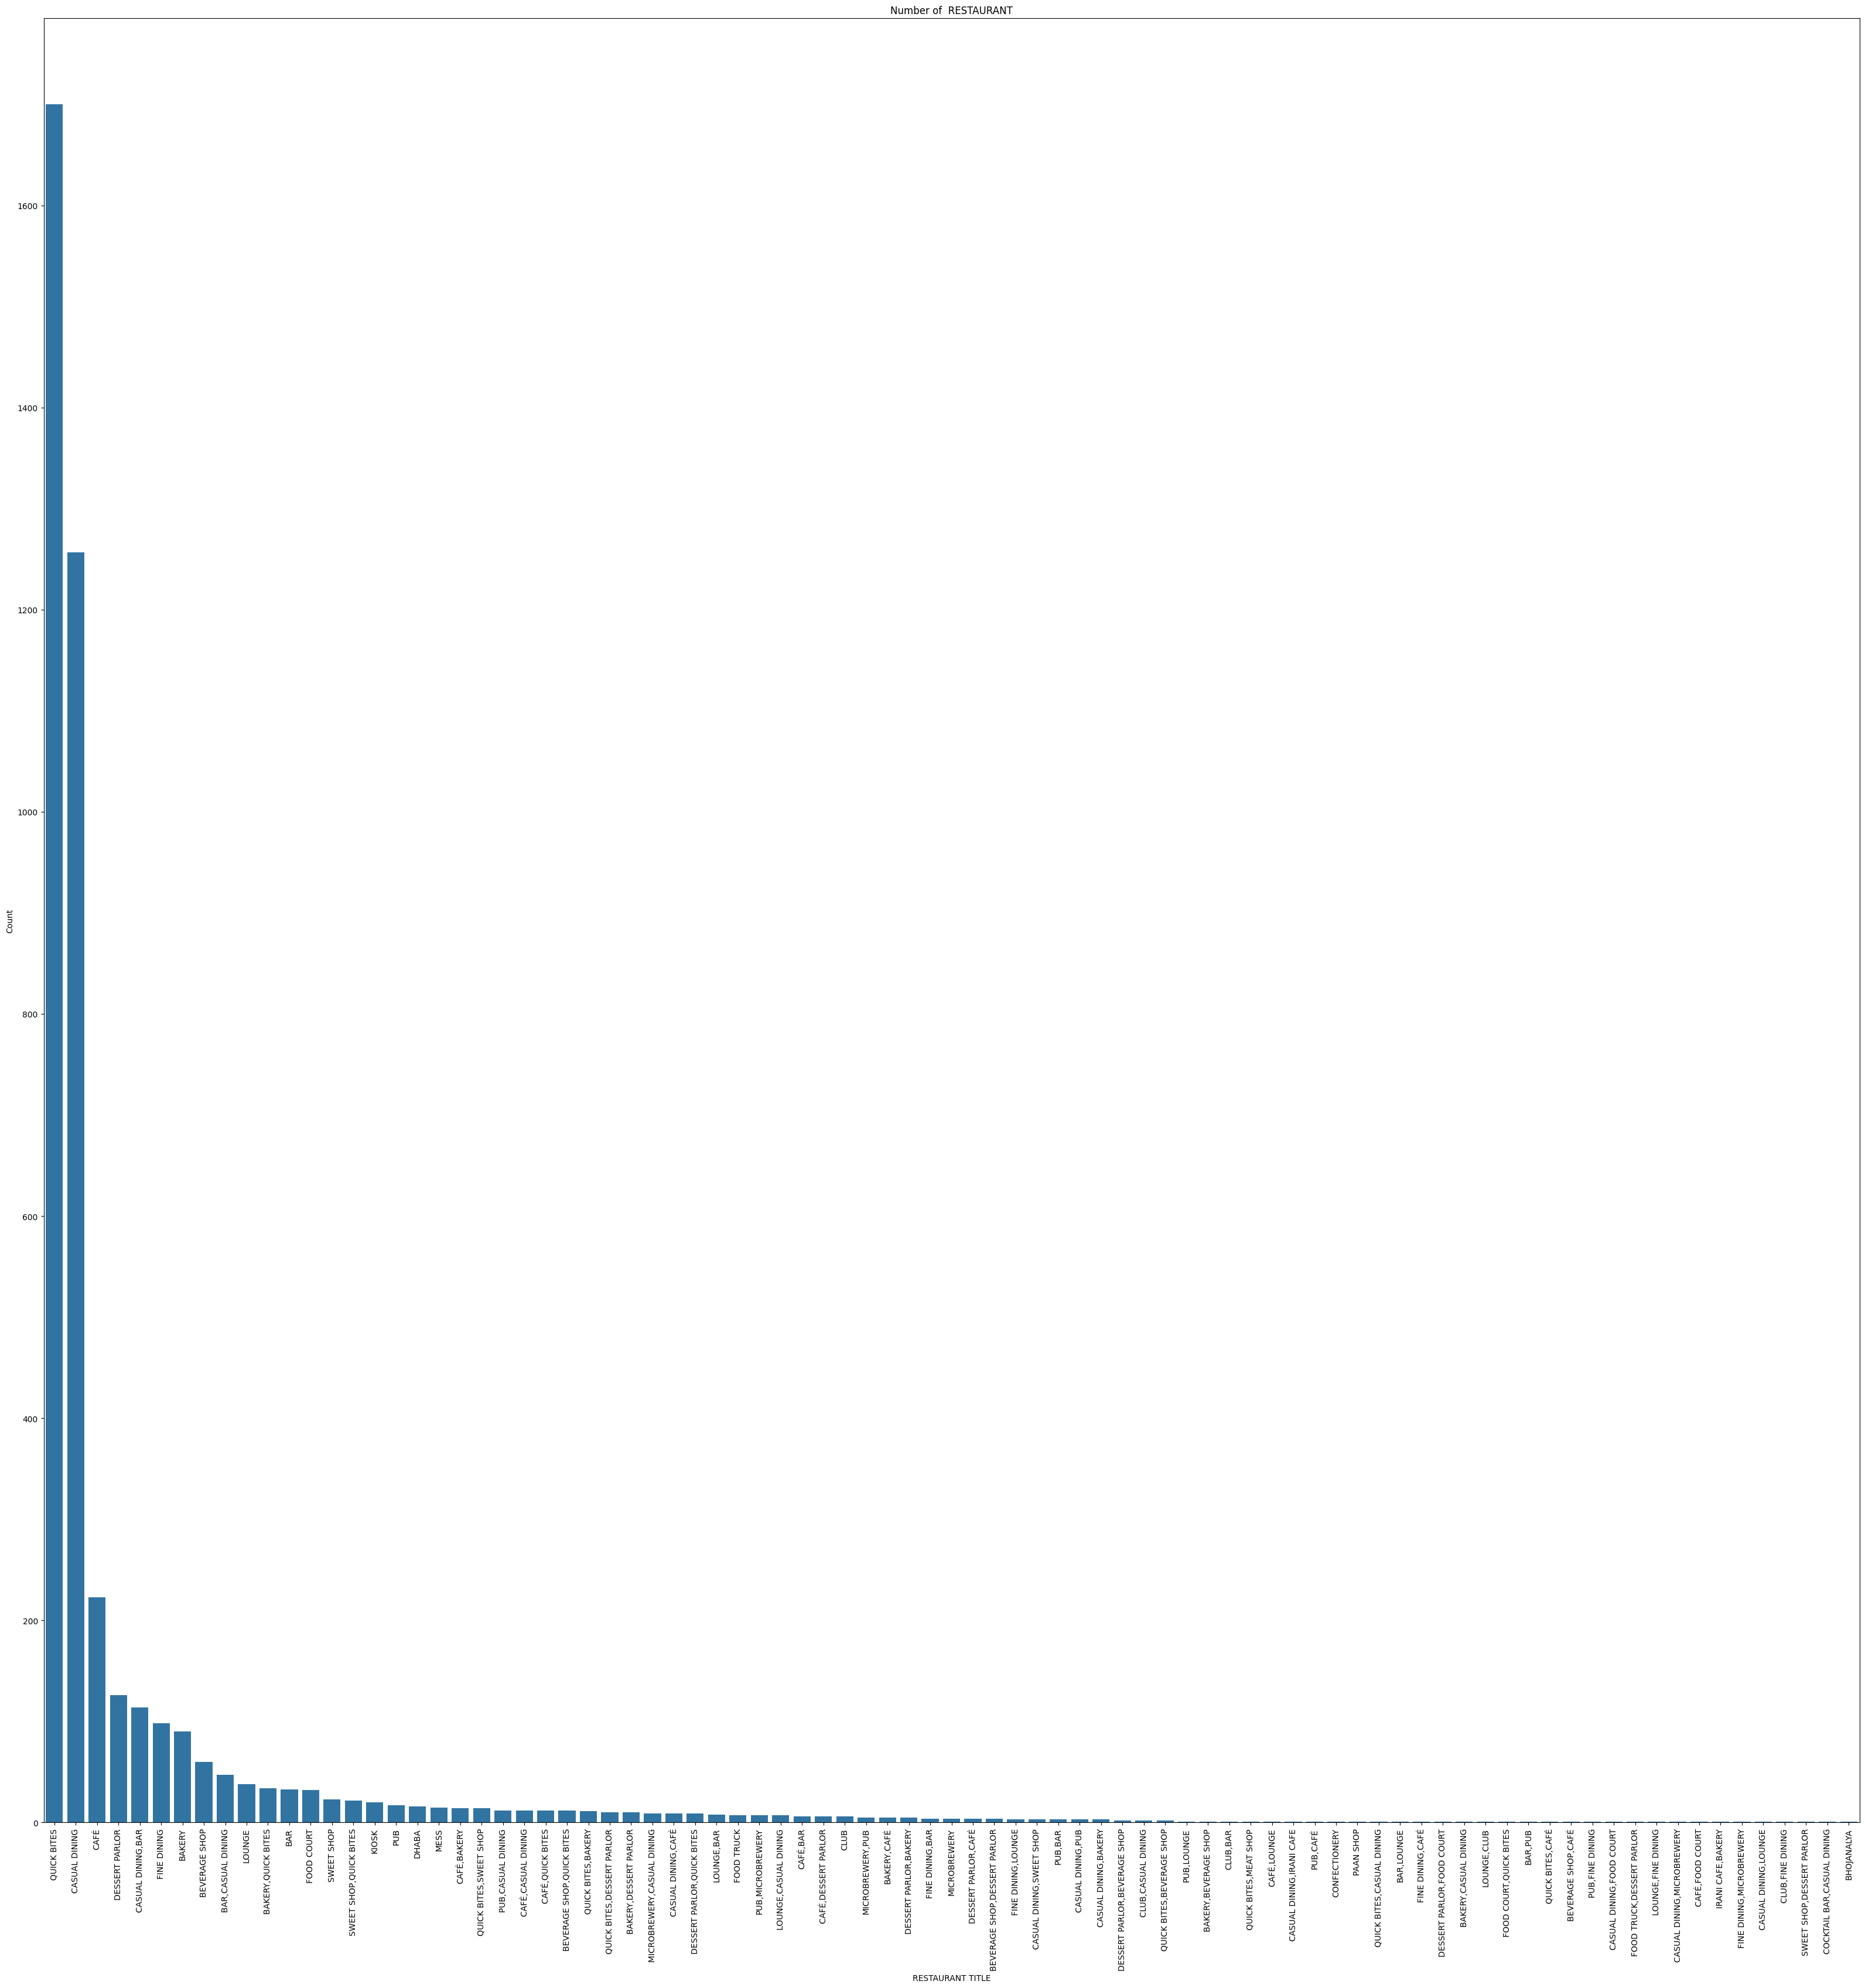

In [194]:
fig=plt.figure(figsize=(40,40))
sns.barplot(x=dftst['TITLE'].value_counts().index, y=dftst['TITLE'].value_counts())
plt.xlabel('RESTAURANT TITLE')
plt.ylabel('Count')
plt.title('Number of  RESTAURANT')
plt.xticks(rotation=90)
plt.show()


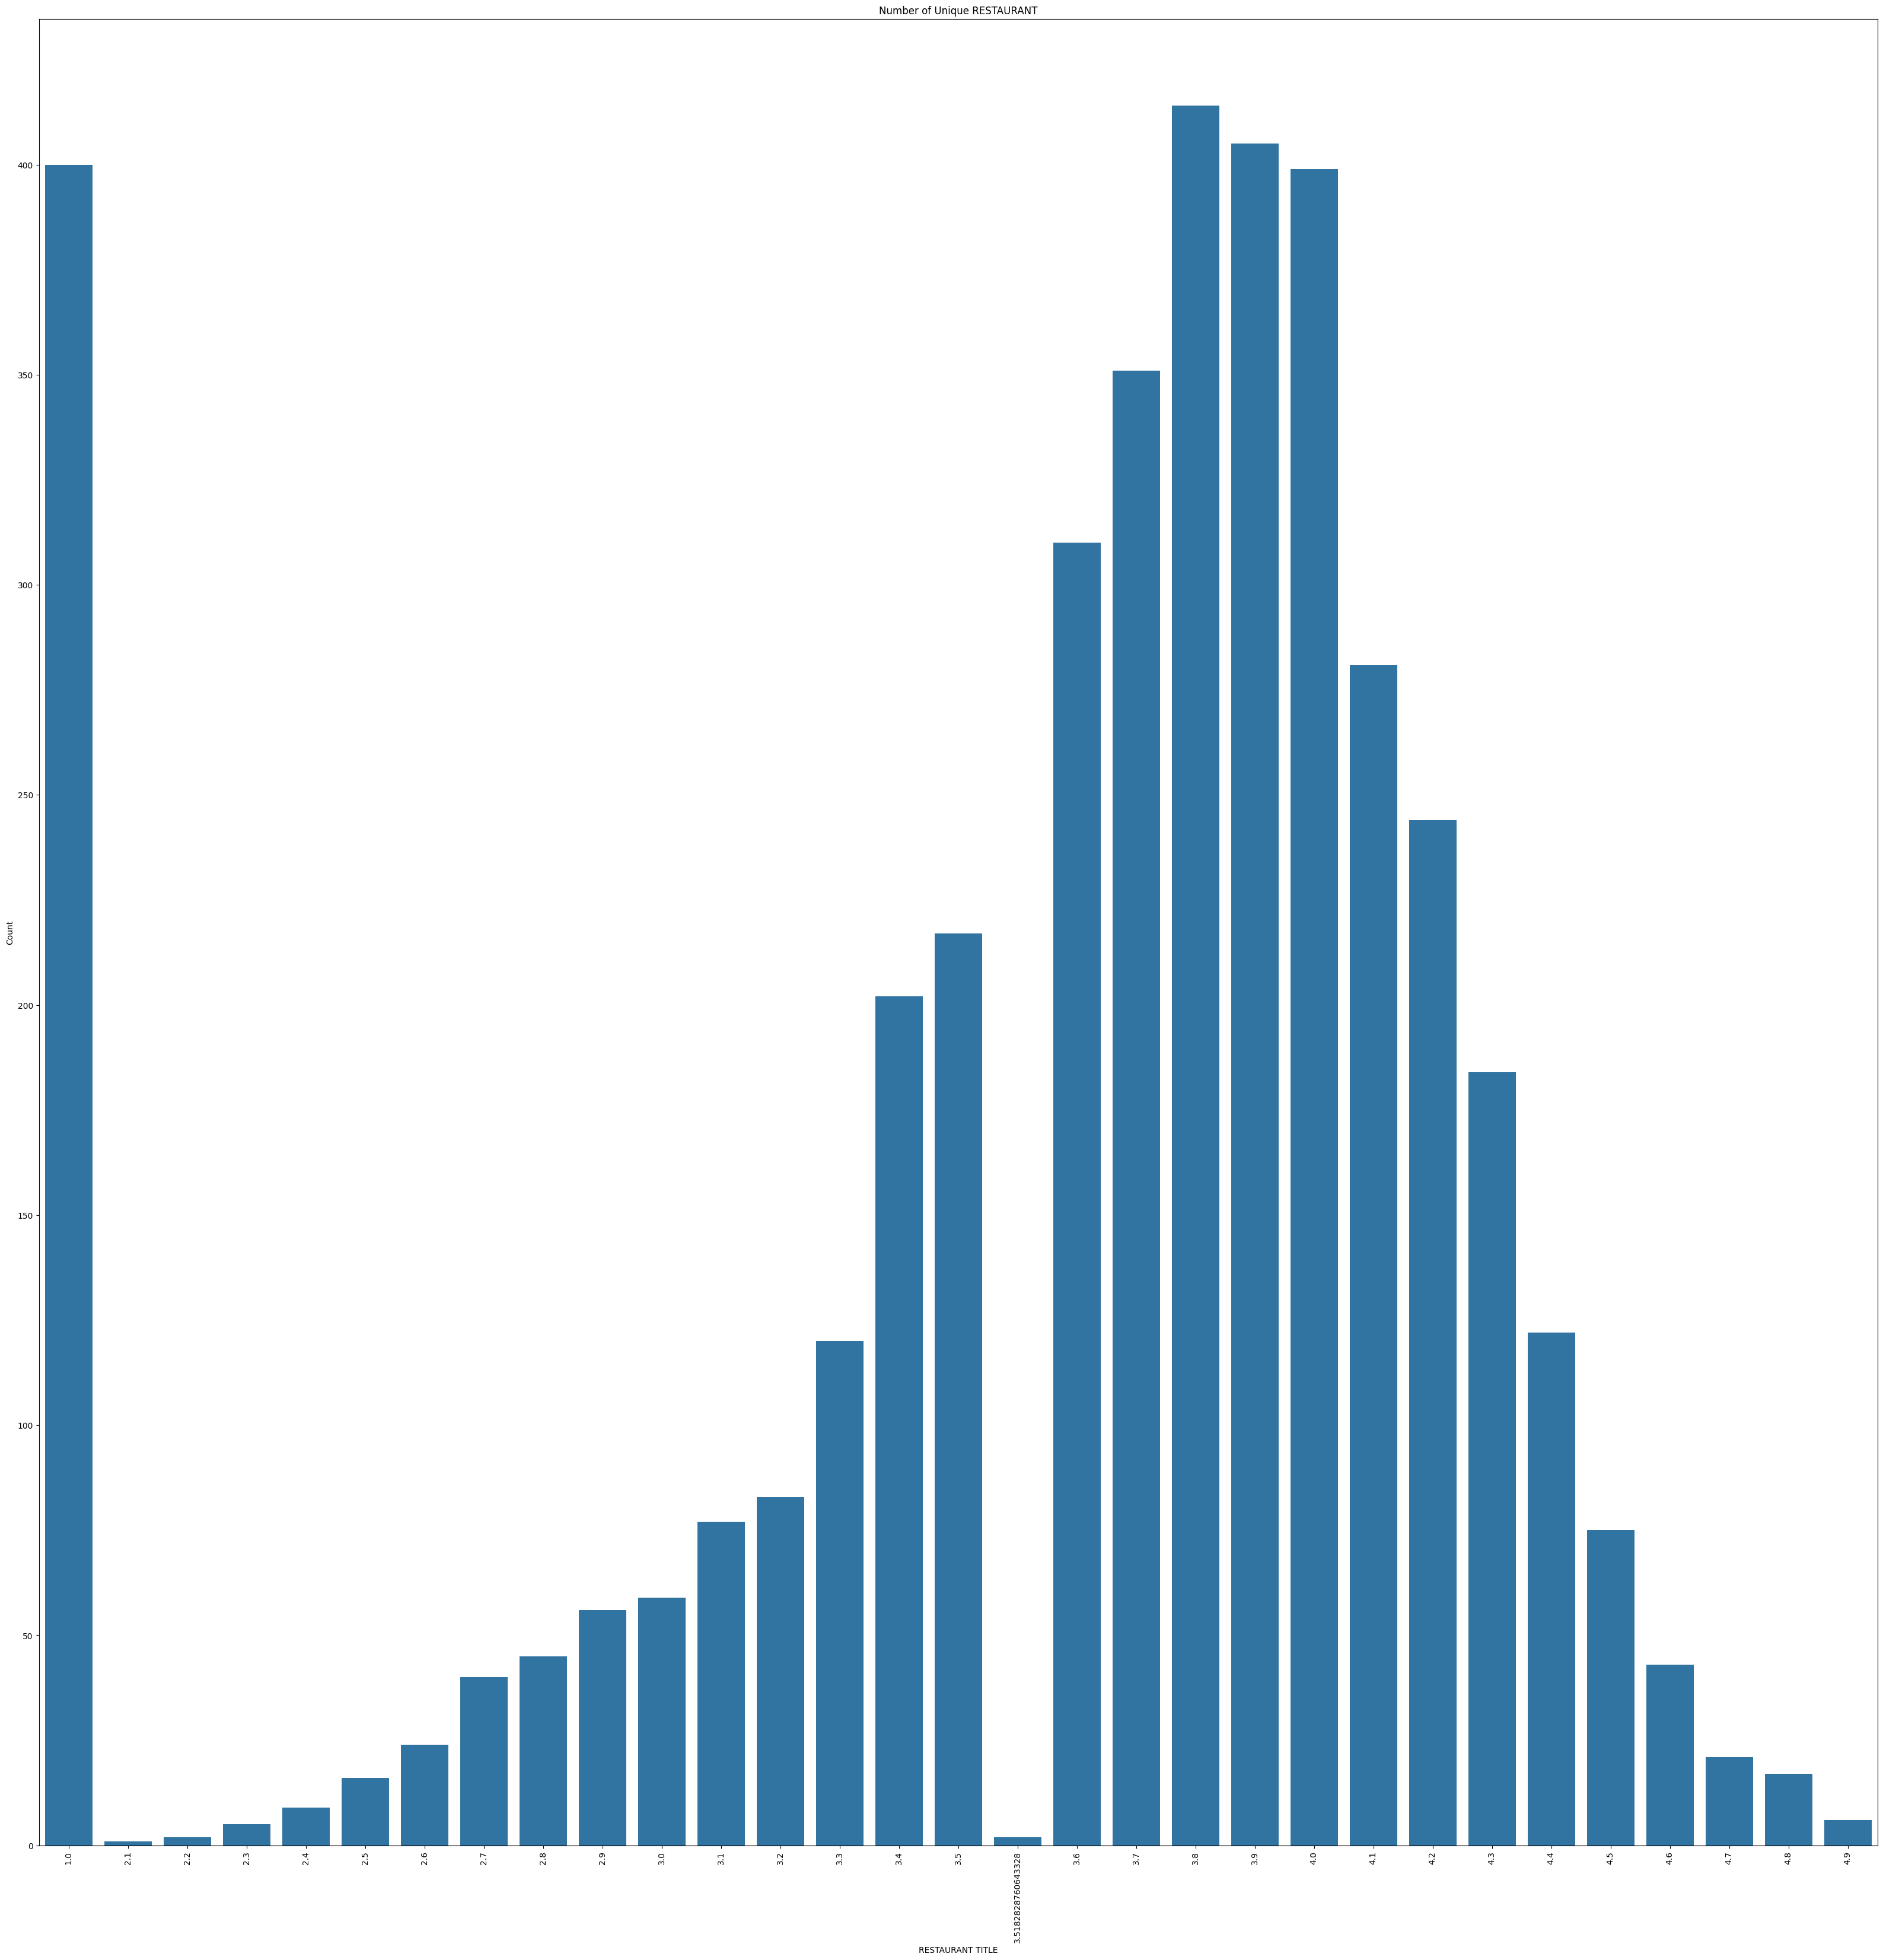

In [195]:
fig=plt.figure(figsize=(40,40))
sns.barplot(x=dftst['RATING'].value_counts().index, y=dftst['RATING'].value_counts())
plt.xlabel('RESTAURANT TITLE')
plt.ylabel('Count')
plt.title('Number of Unique RESTAURANT')
plt.xticks(rotation=90)
plt.show()


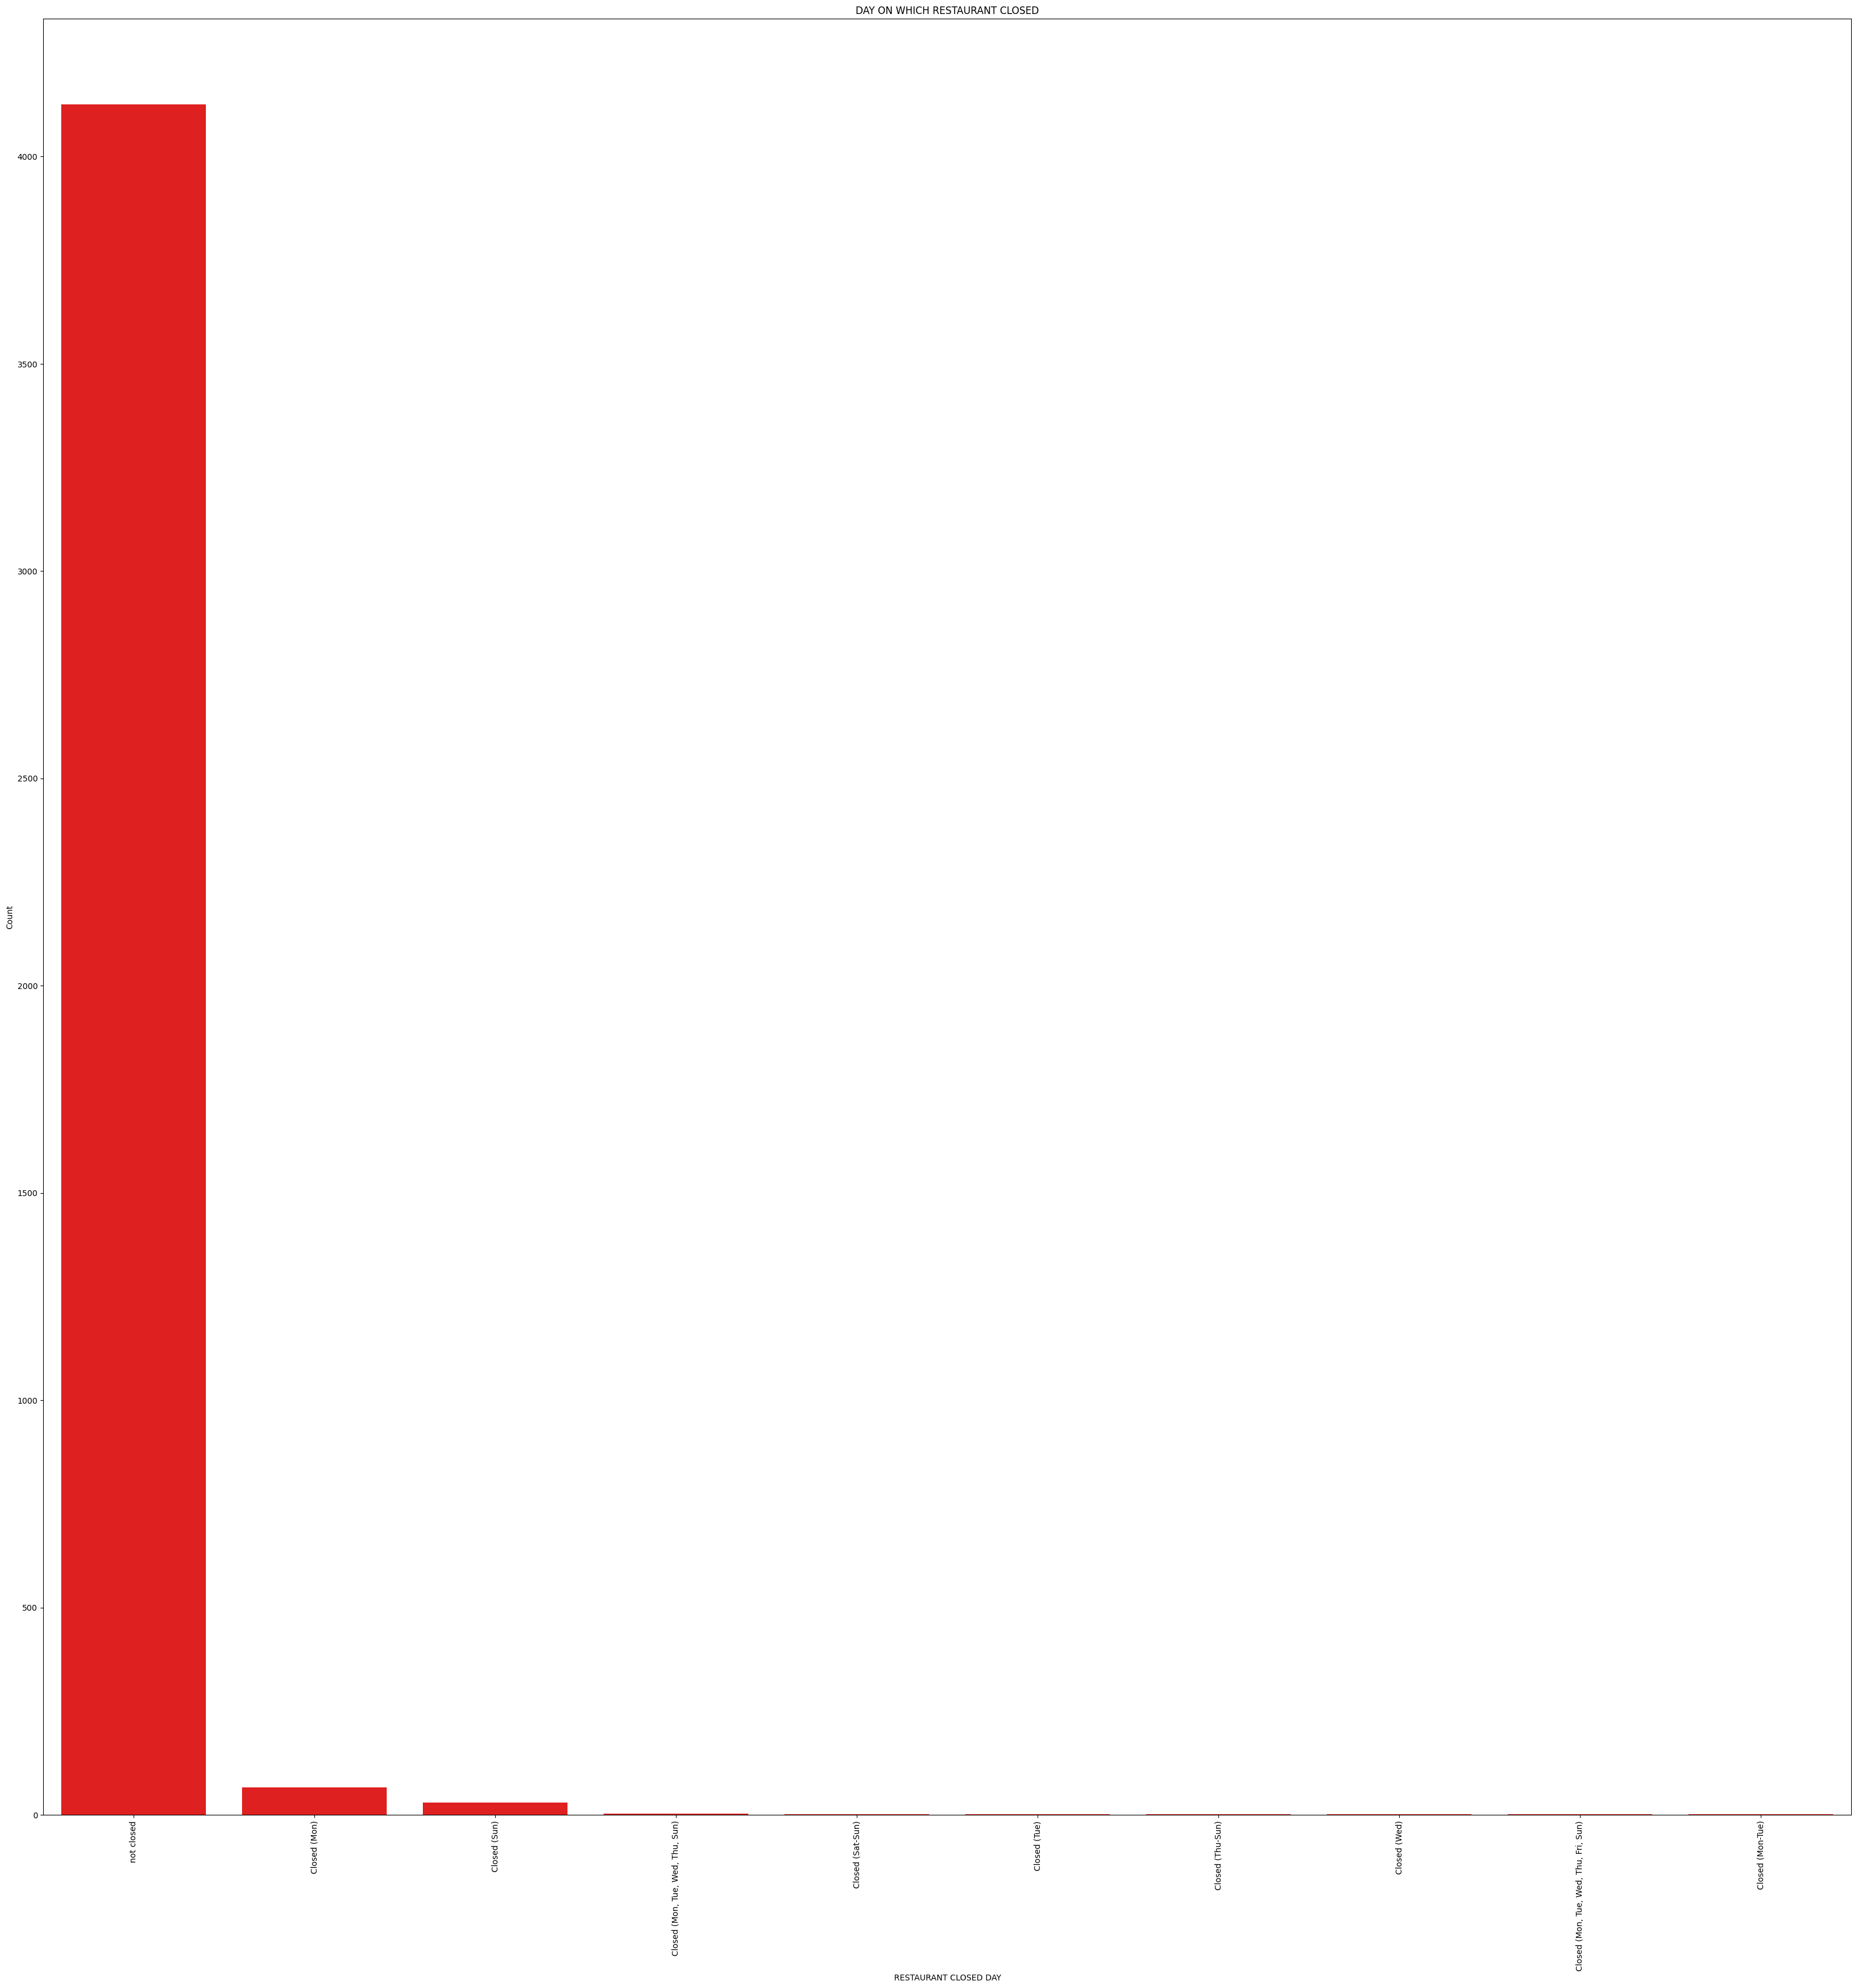

In [197]:
fig=plt.figure(figsize=(40,40))
sns.barplot(x=dftst['CLOSED'].value_counts().index, y=dftst['CLOSED'].value_counts(),color='red')
plt.xlabel('RESTAURANT CLOSED DAY')
plt.ylabel('Count')
plt.title('DAY ON WHICH RESTAURANT CLOSED')
plt.xticks(rotation=90)
plt.show()




In [200]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dftst["TITLE"]=le.fit_transform(dftst["TITLE"])
dftst["CUISINES"]=le.fit_transform(dftst["CUISINES"])
dftst["TIME"]=le.fit_transform(dftst["TIME"])
dftst["CITY"]=le.fit_transform(dftst["CITY"])
dftst["LOCALITY"]=le.fit_transform(dftst["LOCALITY"])
dftst["CLOSED"]=le.fit_transform(dftst["CLOSED"])
dftst['VOTES'] =dftst['VOTES'].astype(float)


In [201]:
dftst

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,CLOSED,CITY_MEAN_RAT
0,23,4085,1293,503,110,662,4.3,564.000000,9,3.546032
1,74,12680,1632,933,96,221,4.2,61.000000,9,3.708844
2,23,1411,1455,219,96,411,3.8,350.000000,9,3.708844
3,74,204,208,1071,41,456,3.8,1445.000000,9,3.573333
4,74,13453,1637,208,78,300,3.6,23.000000,9,2.426170
...,...,...,...,...,...,...,...,...,...,...
4225,23,9057,1425,103,108,597,3.9,287.000000,9,3.741339
4226,74,1247,267,262,9,237,4.3,469.000000,9,3.695190
4227,74,8617,679,1052,41,696,3.7,53.000000,9,3.573333
4228,74,6485,1541,215,78,332,1.0,429.652821,9,2.426170


TITLE                Axes(0.125,0.77;0.110714x0.11)
RESTAURANT_ID     Axes(0.257857,0.77;0.110714x0.11)
CUISINES          Axes(0.390714,0.77;0.110714x0.11)
TIME              Axes(0.523571,0.77;0.110714x0.11)
CITY              Axes(0.656429,0.77;0.110714x0.11)
LOCALITY          Axes(0.789286,0.77;0.110714x0.11)
RATING              Axes(0.125,0.638;0.110714x0.11)
VOTES            Axes(0.257857,0.638;0.110714x0.11)
CLOSED           Axes(0.390714,0.638;0.110714x0.11)
CITY_MEAN_RAT    Axes(0.523571,0.638;0.110714x0.11)
dtype: object

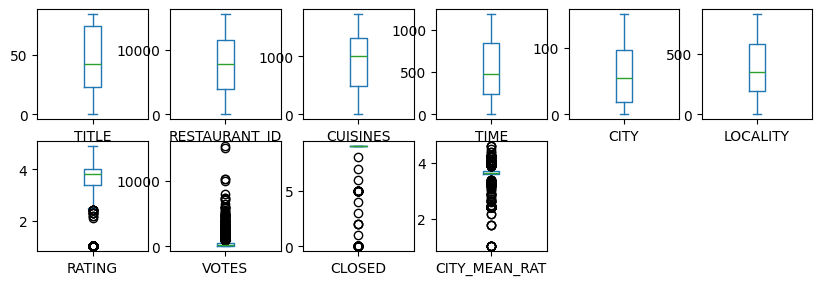

In [206]:
dftst.plot(kind='box',subplots=True,layout=(6,6),figsize=(10,10))

In [203]:
dftst.rename(columns={"RATING_x":'RATING'},inplace =True)

In [204]:
dftst.rename(columns={"RATING_y":'CITY_MEAN_RAT'},inplace =True)

In [207]:
Q1=dftst['CLOSED'].quantile(0.25)
Q2=dftst['CLOSED'].quantile(0.5)
Q3=dftst['CLOSED'].quantile(0.75)
iqr=Q3-Q1
lowfence=Q1-1.5*iqr
uppfence=Q3+1.5*iqr
print(lowfence)
print(uppfence)


9.0
9.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1f6b2d3dd90>,
 'caps': [<matplotlib.lines.Line2D at 0x1f6b2d3f190>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f6b2d3d3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f6b2d50190>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f6b2d50a50>],
 'means': []}

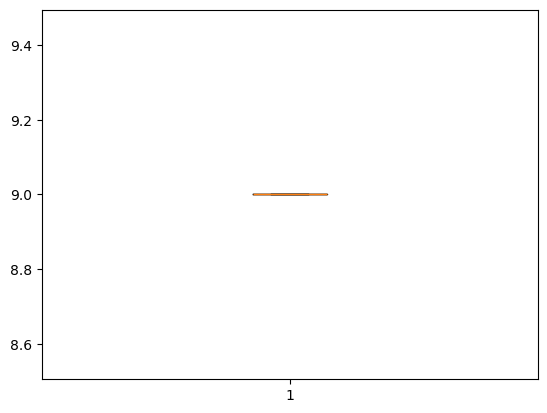

In [211]:
from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'CLOSED':9.0},max_capping_dict={'CLOSED':9.0})
dftst[['CLOSED']]=arb.fit_transform(dftst[['CLOSED']])
plt.boxplot(dftst['CLOSED'])


In [209]:
Q1=dftst['CITY_MEAN_RAT'].quantile(0.25)
Q2=dftst['CITY_MEAN_RAT'].quantile(0.5)
Q3=dftst['CITY_MEAN_RAT'].quantile(0.75)
iqr=Q3-Q1
lowfence=Q1-1.5*iqr
uppfence=Q3+1.5*iqr
print(lowfence)
print(uppfence)


3.4205819772843045
3.881800473493363


{'whiskers': [<matplotlib.lines.Line2D at 0x1f6b2da95d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f6b2daad50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f6b2da8cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f6b2db0190>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f6b2db0d10>],
 'means': []}

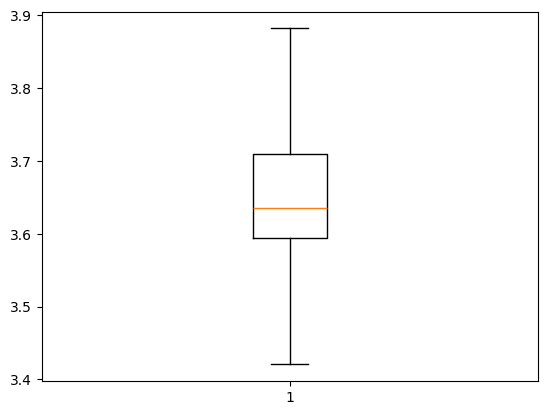

In [212]:
from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'CITY_MEAN_RAT':3.4205819772843045},max_capping_dict={'CITY_MEAN_RAT':3.881800473493363})
dftst[['CITY_MEAN_RAT']]=arb.fit_transform(dftst[['CITY_MEAN_RAT']])
plt.boxplot(dftst['CITY_MEAN_RAT'])


In [213]:
Q1=dftst['VOTES'].quantile(0.25)
Q2=dftst['VOTES'].quantile(0.5)
Q3=dftst['VOTES'].quantile(0.75)
iqr=Q3-Q1
lowfence=Q1-1.5*iqr
uppfence=Q3+1.5*iqr
print(lowfence)
print(uppfence)



-479.4792319749216
975.1320532915361


{'whiskers': [<matplotlib.lines.Line2D at 0x1f6b2e0c710>,
 'caps': [<matplotlib.lines.Line2D at 0x1f6b2e0df50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f6b2debe90>],
 'medians': [<matplotlib.lines.Line2D at 0x1f6b2e0f450>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f6b2e18050>],
 'means': []}

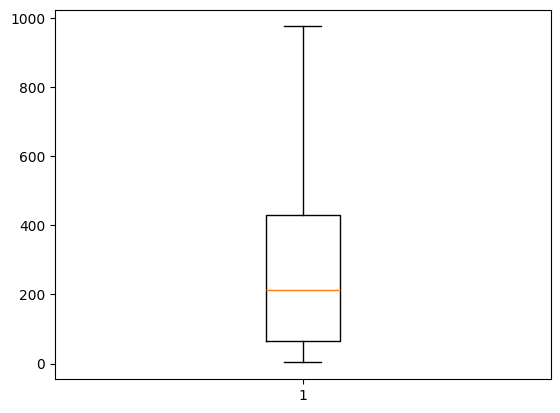

In [214]:
from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'VOTES':-479.4792319749216},max_capping_dict={'VOTES':975.1320532915361})
dftst[['VOTES']]=arb.fit_transform(dftst[['VOTES']])
plt.boxplot(dftst['VOTES'])


In [215]:
Q1=dftst['RATING'].quantile(0.25)
Q2=dftst['RATING'].quantile(0.5)
Q3=dftst['RATING'].quantile(0.75)
iqr=Q3-Q1
lowfence=Q1-1.5*iqr
uppfence=Q3+1.5*iqr
print(lowfence)
print(uppfence)

2.5
4.9


{'whiskers': [<matplotlib.lines.Line2D at 0x1f6b2fac090>,
 'caps': [<matplotlib.lines.Line2D at 0x1f6b2fad7d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f6b2f97a10>],
 'medians': [<matplotlib.lines.Line2D at 0x1f6b2faedd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f6b2faf890>],
 'means': []}

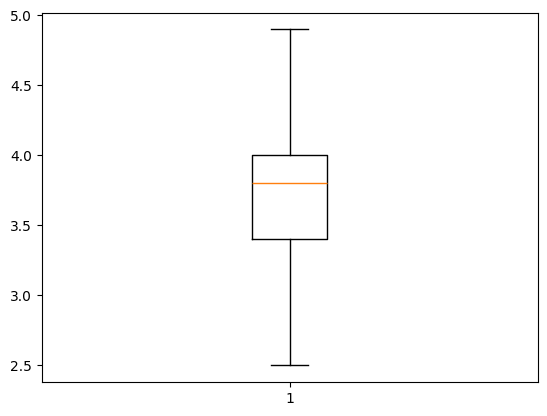

In [216]:
from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'RATING':2.5},max_capping_dict={'RATING':4.9})
dftst[['RATING']]=arb.fit_transform(dftst[['RATING']])
plt.boxplot(dftst['RATING'])


TITLE                Axes(0.125,0.77;0.110714x0.11)
RESTAURANT_ID     Axes(0.257857,0.77;0.110714x0.11)
CUISINES          Axes(0.390714,0.77;0.110714x0.11)
TIME              Axes(0.523571,0.77;0.110714x0.11)
CITY              Axes(0.656429,0.77;0.110714x0.11)
LOCALITY          Axes(0.789286,0.77;0.110714x0.11)
RATING              Axes(0.125,0.638;0.110714x0.11)
VOTES            Axes(0.257857,0.638;0.110714x0.11)
CLOSED           Axes(0.390714,0.638;0.110714x0.11)
CITY_MEAN_RAT    Axes(0.523571,0.638;0.110714x0.11)
dtype: object

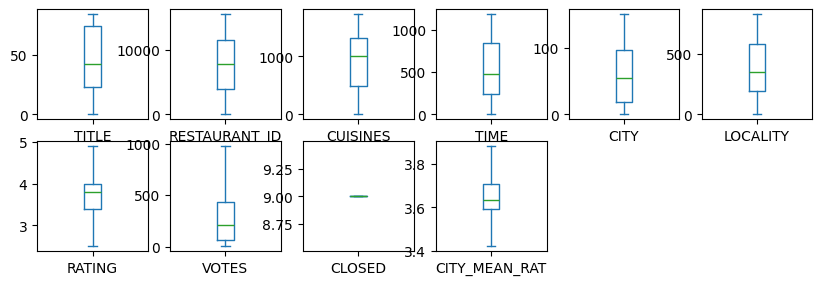

In [218]:
dftst.plot(kind='box',subplots=True,layout=(6,6),figsize=(10,10))

In [ ]:

dftst.drop(['CLOSED','RESTAURANT_ID'],axis=1,inplace=True)

In [225]:

correlation=dftst.corr()

<Axes: >

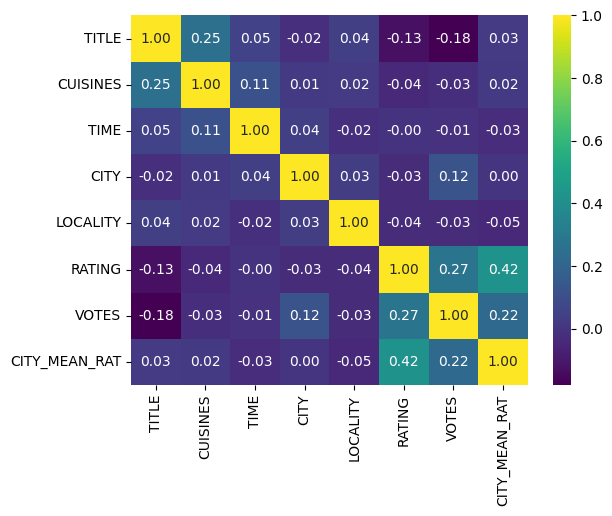

In [226]:
sns.heatmap(correlation,cmap='viridis',annot=True,fmt='.2f')

In [227]:
from sklearn.preprocessing import StandardScaler
    # here i am performing scaling on input Features in a dataframe dftst 
scal_data=StandardScaler()
dftst=pd.DataFrame(scal_data.fit_transform(dftst),columns=dftst.columns)



In [228]:
dftst

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,CITY_MEAN_RAT
0,-0.866435,0.731764,-0.059371,1.336594,1.186120,1.150240,0.806375,-0.828460
1,1.058232,1.411897,1.203544,0.974865,-0.691502,0.970287,-0.847192,0.697300
2,-0.866435,1.056783,-0.893483,0.974865,0.117451,0.250473,0.102869,0.697300
3,1.058232,-1.445064,1.608851,-0.446211,0.309045,0.250473,2.157934,-0.572609
4,1.058232,1.421928,-0.925790,0.509786,-0.355148,-0.109434,-0.972114,-2.004090
...,...,...,...,...,...,...,...,...
4225,-0.866435,0.996594,-1.234176,1.284918,0.909373,0.430426,-0.104238,1.001830
4226,1.058232,-1.326692,-0.767191,-1.273020,-0.623380,1.150240,0.494071,0.569344
4227,1.058232,-0.500100,1.553048,-0.446211,1.330880,0.070519,-0.873492,-0.572609
4228,1.058232,1.229324,-0.905231,0.509786,-0.218903,-2.088923,0.364720,-2.004090


In [229]:
dftst.skew()

TITLE           -0.037991
CUISINES        -0.210741
TIME             0.314174
CITY             0.087155
LOCALITY         0.312940
RATING          -0.719418
VOTES            0.991853
CITY_MEAN_RAT   -0.616660
dtype: float64

In [230]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(dftst.values,i) for i in range(len(dftst.columns))]
vif['features']=x.columns
vif


,vif values,features
0,1.124864,TITLE
1,1.080901,CUISINES
2,1.016853,TIME
3,1.023693,CITY
4,1.006256,LOCALITY
5,1.293628,RATING
6,1.146697,VOTES
7,1.251055,CITY_MEAN_RAT


In [232]:
model=joblib.load('Restaurant_food_cost.pkl')

In [233]:
prediction=model.predict(dftst)
prediction

array([1069.52353046,  337.86510019,  681.70529108, ...,  374.90082343,
        395.26511456,  538.35629525])

In [234]:
df=pd.DataFrame()
df['predicted']=prediction
df

,predicted
0,1069.523530
1,337.865100
2,681.705291
3,434.669950
4,303.062335
...,...
4225,729.981008
4226,411.030427
4227,374.900823
4228,395.265115
